## Walmart's Sales Prediction

## Libraries and Data Loading

In [ ]:
%matplotlib inline
import pandas as pd
from numpy import mean
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import statsmodels.api as sns
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from scipy.stats import skew
from scipy.special import boxcox1p
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore") # ignoring annoying warnings

# from google.colab import drive

## Exploratory and Preparation of Data

In [ ]:
df = pd.read_csv('/Users/wilbertlimson/Desktop/MacBOOk/OM441/walmart_cleaned.csv')

In [ ]:
pd.DataFrame({'Type': df.dtypes})

,Type
Unnamed: 0,int64
Store,int64
Date,object
IsHoliday,int64
Dept,float64
Weekly_Sales,float64
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64


In [ ]:
df.head()
print(df.head(), "\n")
print("rows + collumn", "\n", df.shape)

   Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  Temperature  \
0           0      1  2010-02-05          0   1.0      24924.50        42.31   
1           1      1  2010-02-05          0  26.0      11737.12        42.31   
2           2      1  2010-02-05          0  17.0      13223.76        42.31   
3           3      1  2010-02-05          0  45.0         37.44        42.31   
4           4      1  2010-02-05          0  28.0       1085.29        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Type    Size  
0  211.096358         8.106     3  151315 

In [ ]:
unique_stores = df['Store'].nunique()
print(f"There are {unique_stores} different stores in the dataset.", "\n")
print(df['Store'].value_counts(ascending=True))

There are 45 different stores in the dataset. 

Store
36     6222
33     6487
43     6751
42     6953
30     7156
44     7169
37     7206
38     7362
9      8867
5      8999
3      9036
16     9443
29     9455
35     9528
21     9582
45     9637
22     9688
12     9705
7      9762
25     9804
26     9854
18     9859
17     9864
39     9878
8      9895
15     9901
40    10017
14    10040
23    10050
11    10062
41    10088
28    10113
31    10142
19    10148
32    10202
6     10211
20    10214
34    10224
27    10225
24    10228
2     10238
1     10244
4     10272
10    10315
13    10474
Name: count, dtype: int64


In [ ]:
# stores = pd.read_csv('Desktop/MacBOOk/OM441/store.csv')
stores = pd.read_csv('store.csv')

In [ ]:
stores.head(5)

,Store,Dept,Size,Type
0,1,1.0,151315,3
1,1,26.0,151315,3
2,1,17.0,151315,3
3,1,45.0,151315,3
4,1,28.0,151315,3


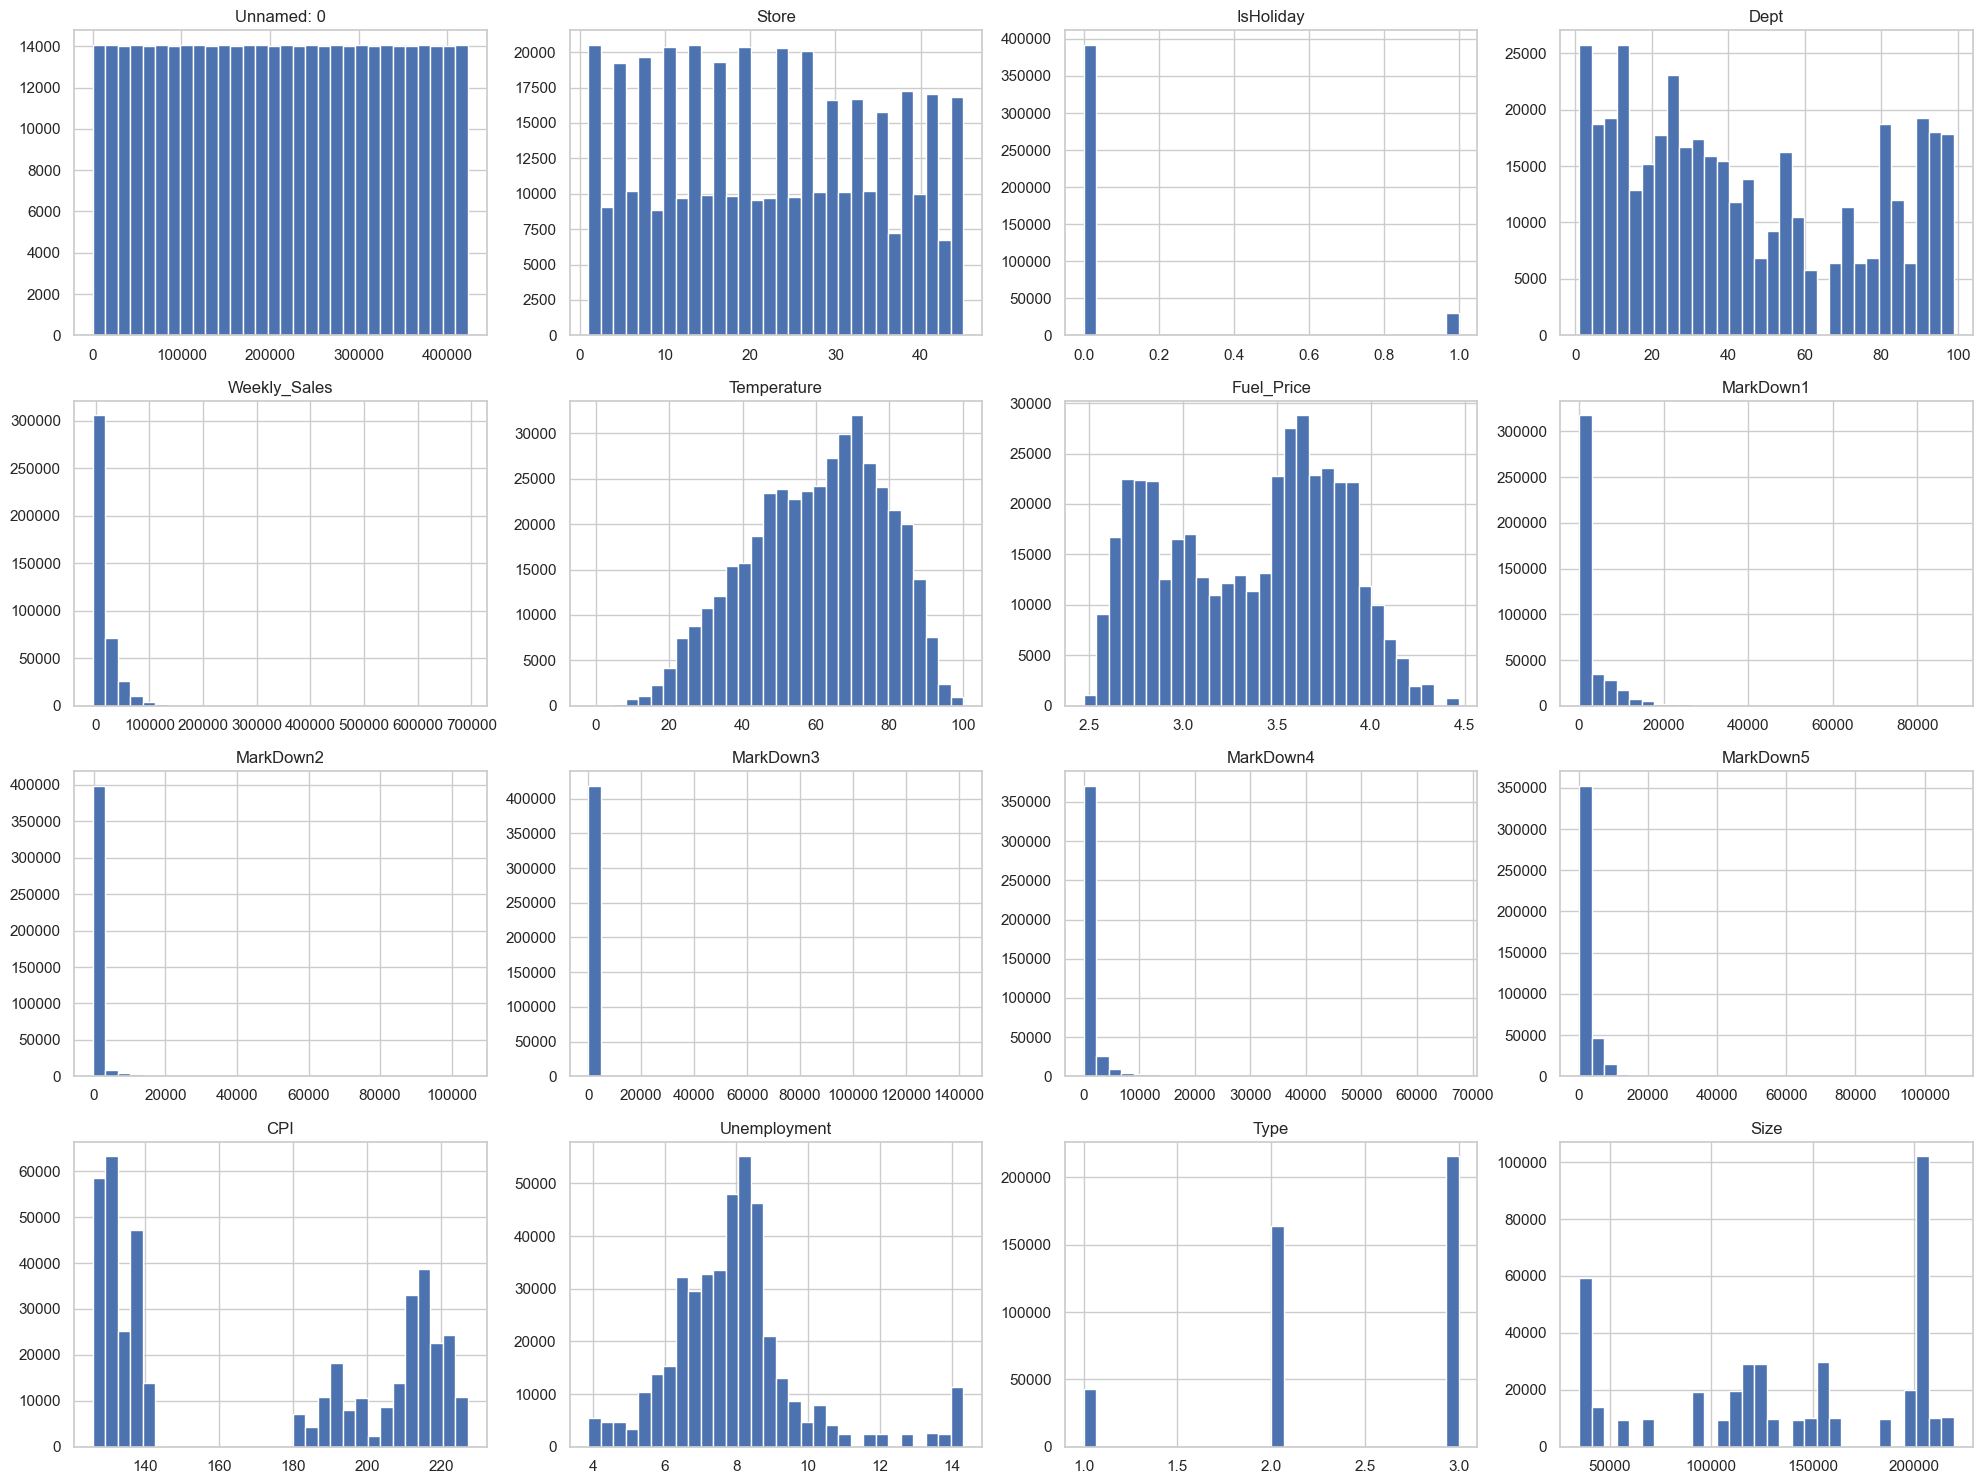

In [ ]:
# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Plot histograms of the numerical columns
df.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# df.set_index('Date', inplace=False) -- this will remove the "Date" from the index
print(df.columns)

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


# Featrue Engineering

In [ ]:
# Ensure 'Date' is a datetime index
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime type

# Note: .week has been deprecated in favor of .isocalendar().week in newer versions of pandas
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

df.set_index('Date', inplace=True)

# Now you can extract the month
df['Month'] = df.index.month

# Assuming 'Size' and 'Type' can be multiplied directly
df['Size_Type'] = df['Size'] * df['Type']

features = ['Size', 'Dept', 'IsHoliday', 'Type', 'CPI', 'Unemployment', 'Month', 'Size_Type']
target = 'Weekly_Sales'


In [ ]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,421570.000000,211611.321278,122195.149363,0.000000,105782.250000,211603.500000,317424.750000,423285.000000
Store,421570.000000,22.200546,12.785297,1.000000,11.000000,22.000000,33.000000,45.000000
IsHoliday,421570.000000,0.070358,0.255750,0.000000,0.000000,0.000000,0.000000,1.000000
Dept,421570.000000,44.260317,30.492054,1.000000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.000000,15981.258123,22711.183519,-4988.940000,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,421570.000000,60.090059,18.447931,-2.060000,46.680000,62.090000,74.280000,100.140000
Fuel_Price,421570.000000,3.361027,0.458515,2.472000,2.933000,3.452000,3.738000,4.468000
MarkDown1,421570.000000,2590.074819,6052.385934,0.000000,0.000000,0.000000,2809.050000,88646.760000
MarkDown2,421570.000000,879.974298,5084.538801,-265.760000,0.000000,0.000000,2.200000,104519.540000
MarkDown3,421570.000000,468.087665,5528.873453,-29.100000,0.000000,0.000000,4.540000,141630.610000


In [ ]:
# Define pysqldf function using a lambda to allow for SQL querying directly on pandas DataFrames
pysqldf = lambda q: sqldf(q, globals())

feat_sto = pd.DataFrame(df)
feat_sto

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month,Size_Type
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,0,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010,2,453945
2010-02-05,1,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010,2,453945
2010-02-05,2,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010,2,453945
2010-02-05,3,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010,2,453945
2010-02-05,4,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010,2,453945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,423281,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012,10,236442
2012-10-26,423282,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012,10,236442
2012-10-26,423283,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012,10,236442


In [ ]:
import sqlite3
print(sqlite3.sqlite_version)

3.45.3


In this dataset we are checking for a certain week days that the Holidays fall on each of the year, so we know how many pre-holidays in each week that is marked 'True' in the 'IsHoliday' field

In [ ]:
import pandas as pd
from pandasql import sqldf

# Define the pysqldf function using a lambda to allow for SQL querying directly on pandas DataFrames
pysqldf = lambda q: sqldf(q, globals())

# Adjust the SQL query to remove any references to 'Train Data' or 'Test Data' and handle all data as one set
sql_query = """
SELECT
    *,
    CASE
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 1 THEN 'Super Bowl'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 2 THEN 'Labor Day'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 3 THEN 'Thanksgiving'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 4 THEN 'Christmas'
    END AS Holiday,
    CASE
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 1 THEN 'Sunday'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 2 THEN 'Monday'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 3 THEN 'Thursday'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 4 AND Year = 2010 THEN 'Saturday'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 4 AND Year = 2011 THEN 'Sunday'
        WHEN ROW_NUMBER() OVER(PARTITION BY Year ORDER BY Week) = 4 AND Year = 2012 THEN 'Tuesday'
    END AS DayOfWeek
FROM (
    SELECT DISTINCT
        Year,
        Week
    FROM df
    WHERE IsHoliday = 1
) T;
"""

# Execute the query
result = pysqldf(sql_query)
result

,Year,Week,Holiday,DayOfWeek
0,2010,6,Super Bowl,Sunday
1,2010,36,Labor Day,Monday
2,2010,47,Thanksgiving,Thursday
3,2010,52,Christmas,Saturday
4,2011,6,Super Bowl,Sunday
5,2011,36,Labor Day,Monday
6,2011,47,Thanksgiving,Thursday
7,2011,52,Christmas,Sunday
8,2012,6,Super Bowl,Sunday
9,2012,36,Labor Day,Monday


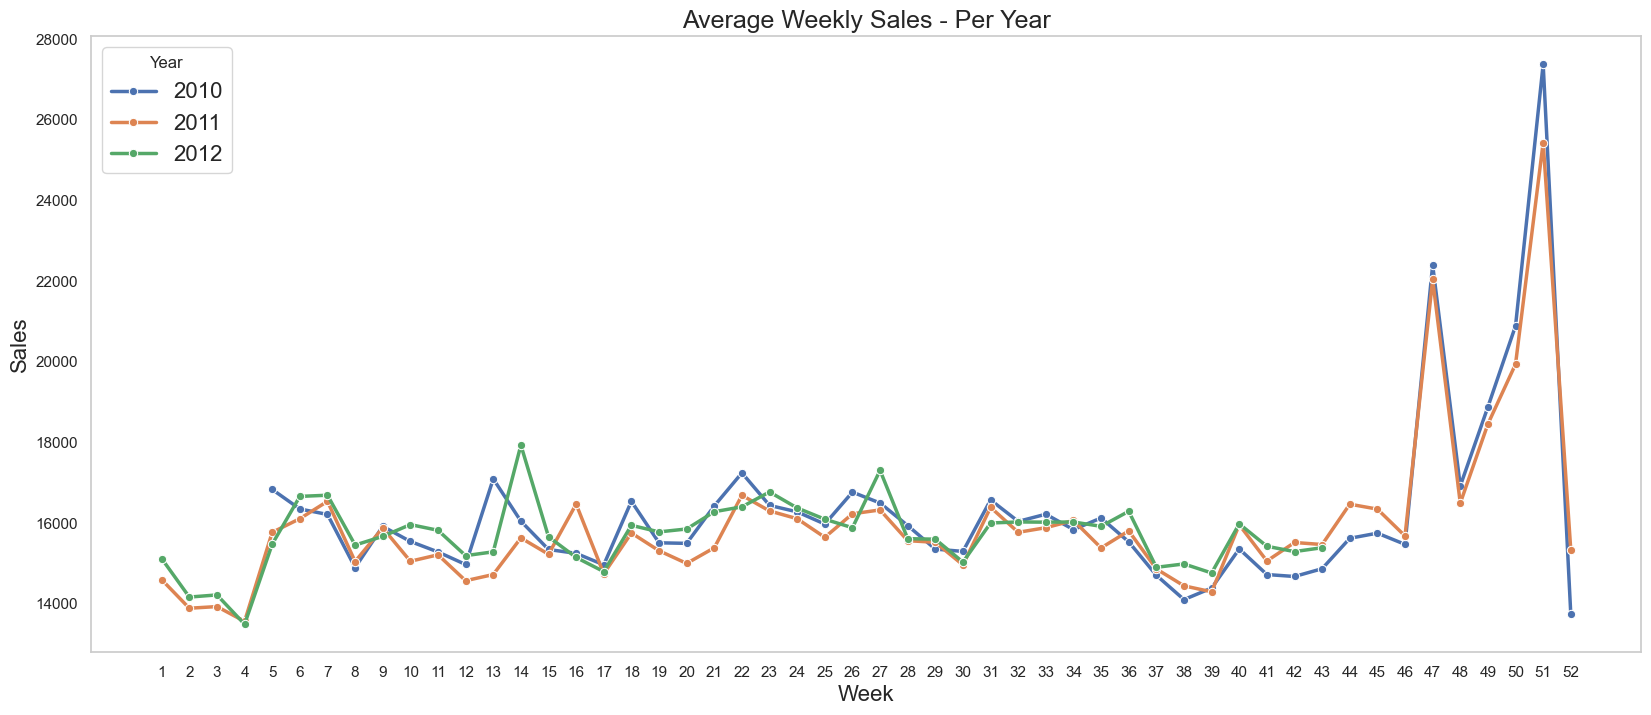

In [ ]:
# Group by 'Year' and 'Week' directly, ensuring the grouping keys are clear and lead to a unique index
weekly_sales_2010 = df[df['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(20, 8))

# Use 'linewidth' instead of 'size' to adjust the line width
sns.lineplot(data=weekly_sales_2010, marker='o', label='2010', linewidth=2.5)
sns.lineplot(data=weekly_sales_2011, marker='o', label='2011', linewidth=2.5)
sns.lineplot(data=weekly_sales_2012, marker='o', label='2012', linewidth=2.5)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(title='Year', loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

> As we can observe, there is one important Holiday not included in 'IsHoliday'. It's the Easter Day. It is always in a Sunday, but can fall on different weeks.

Findings:

1. In 2010 is in Week 13
2. In 2011, Week 16
3. Week 14 in 2012


In [ ]:
df.loc[(df.Year==2010) & (df.Week==13), 'IsHoliday'] = True
df.loc[(df.Year==2011) & (df.Week==16), 'IsHoliday'] = True
df.loc[(df.Year==2012) & (df.Week==14), 'IsHoliday'] = True

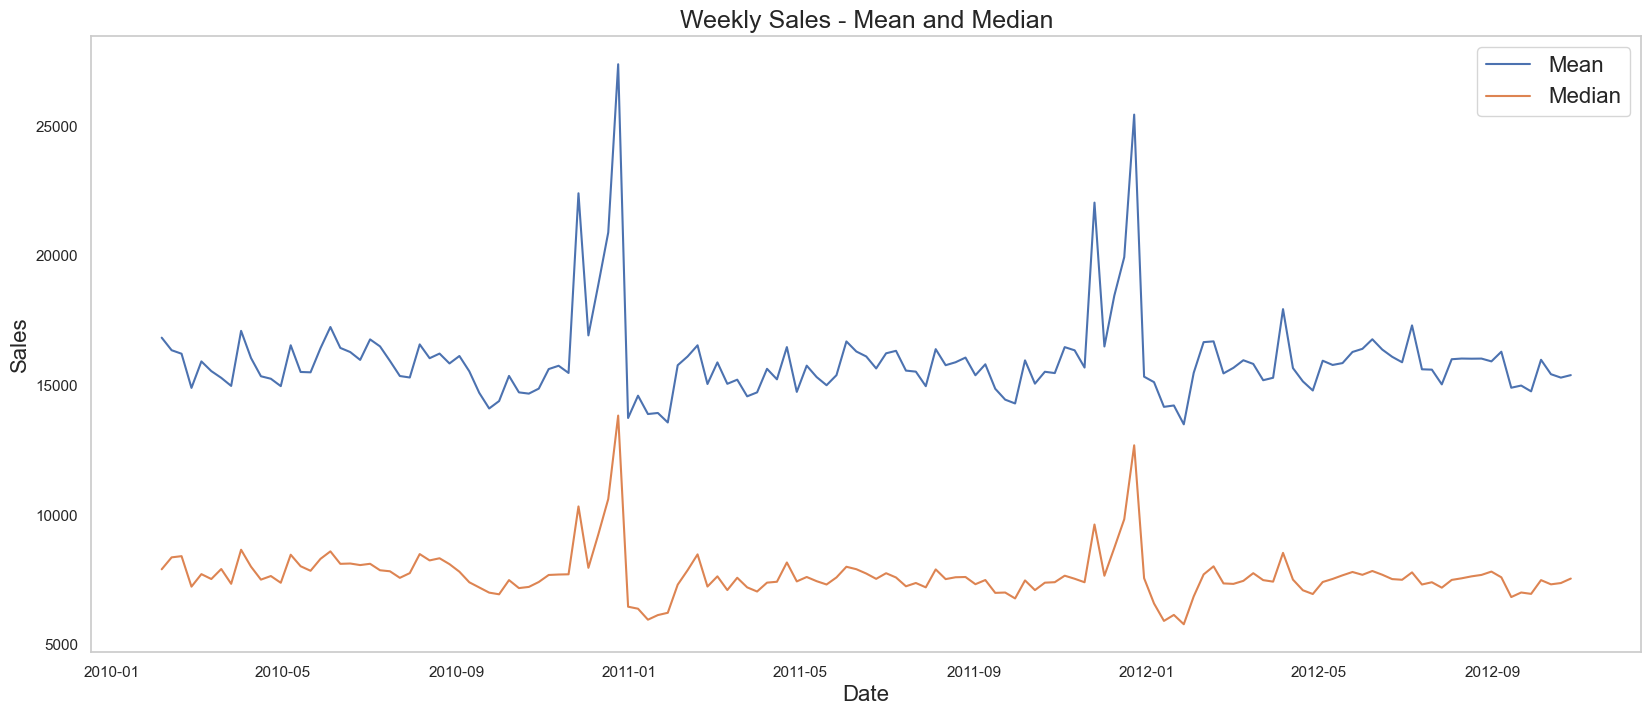

In [ ]:
weekly_sales_mean = df['Weekly_Sales'].groupby(df.index).mean()
weekly_sales_median = df['Weekly_Sales'].groupby(df.index).median()
df.reset_index(inplace=True)

plt.figure(figsize=(20, 8))
sns.lineplot(x=weekly_sales_mean.index, y=weekly_sales_mean.values, label='Mean')
sns.lineplot(x=weekly_sales_median.index, y=weekly_sales_median.values, label='Median')
plt.grid()
plt.legend(loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()


Findings the mean and the median are very different, suggesting that some stores/departments might sell much more than others.

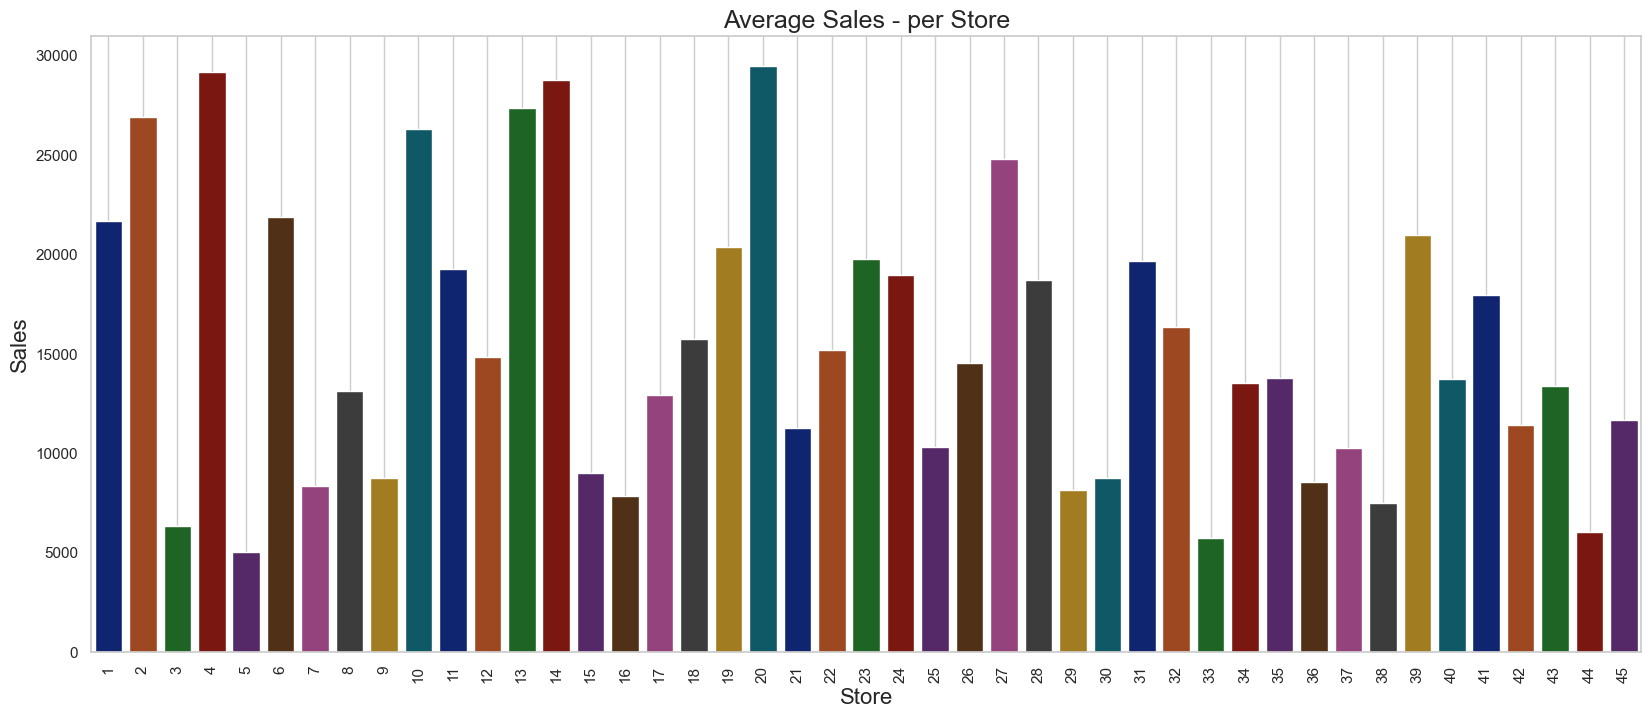

In [ ]:
# Assuming df is your original DataFrame and is already loaded
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()

# Sort the sales in descending order
weekly_sales_sorted = weekly_sales.sort_values(ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x=weekly_sales_sorted.index, y=weekly_sales_sorted.values, palette='dark')

plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.xticks(rotation=90)  # This will rotate the x-axis labels to prevent overlap
plt.show()

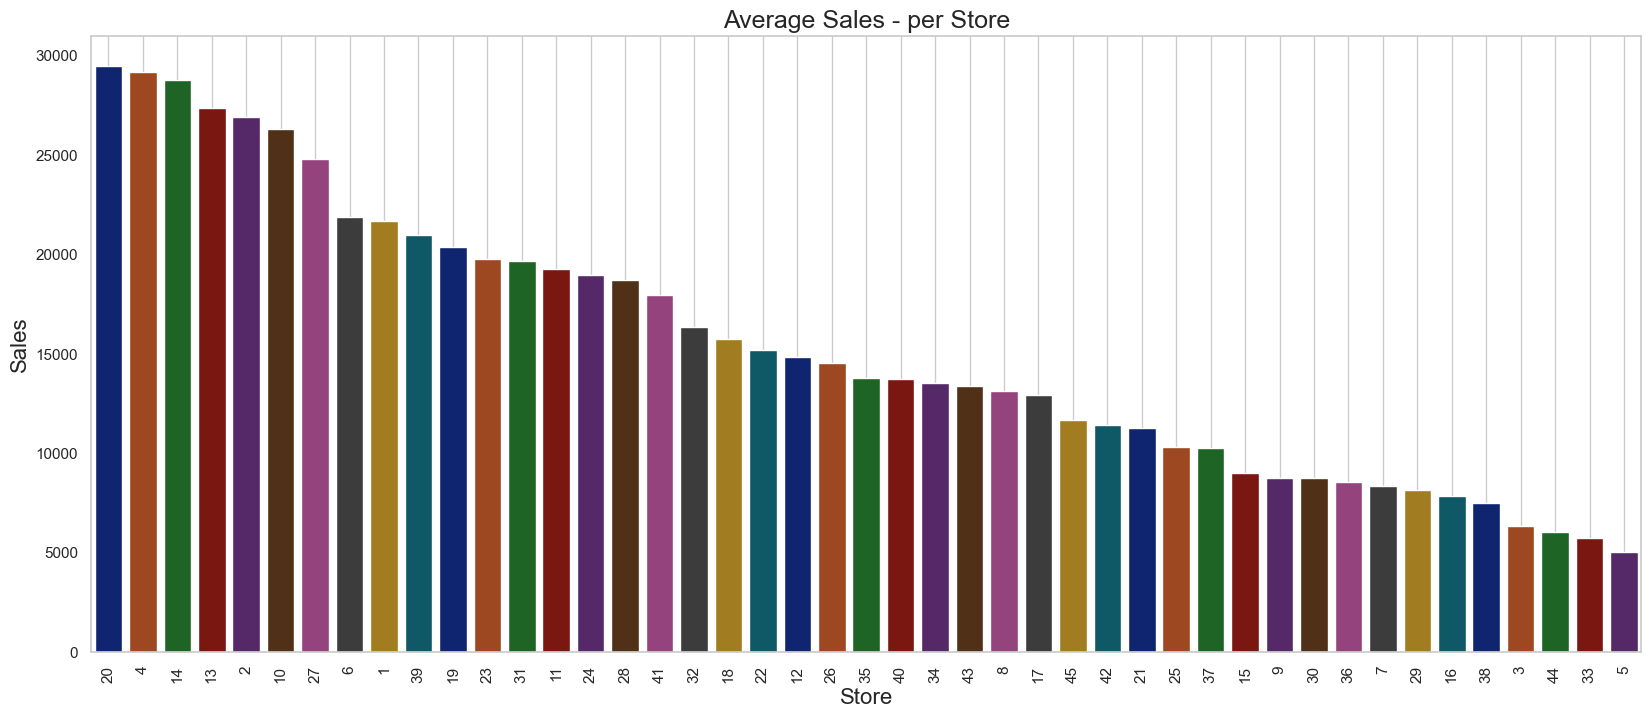

In [ ]:
# Assuming df is your original DataFrame and is already loaded
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()

# Sort the sales in descending order
weekly_sales_sorted = weekly_sales.sort_values(ascending=False)

plt.figure(figsize=(20,8))
# Ensure the barplot reflects the sorted order by using the 'order' parameter
sns.barplot(x=weekly_sales_sorted.index, y=weekly_sales_sorted.values,
            order=weekly_sales_sorted.index, palette='dark')

plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()

In [ ]:
#Graph observation with its inflection point
# I want to change the segmentation of
# Rank 1 (20, 4, 14, 13, 2, 10, 27)
# Rank 2(6, 1, 39, 19, 23, 31, 11, 24, , 28, 41)
# Rank 3(32, 18, 22, 12, 26, 35, 40, 34, 43, 8, 17)
# Rank 4(45, 42, 21, 25, 37, 15, 9, 36, 7, 29, 16, 38, 3, 44, 33, 5)

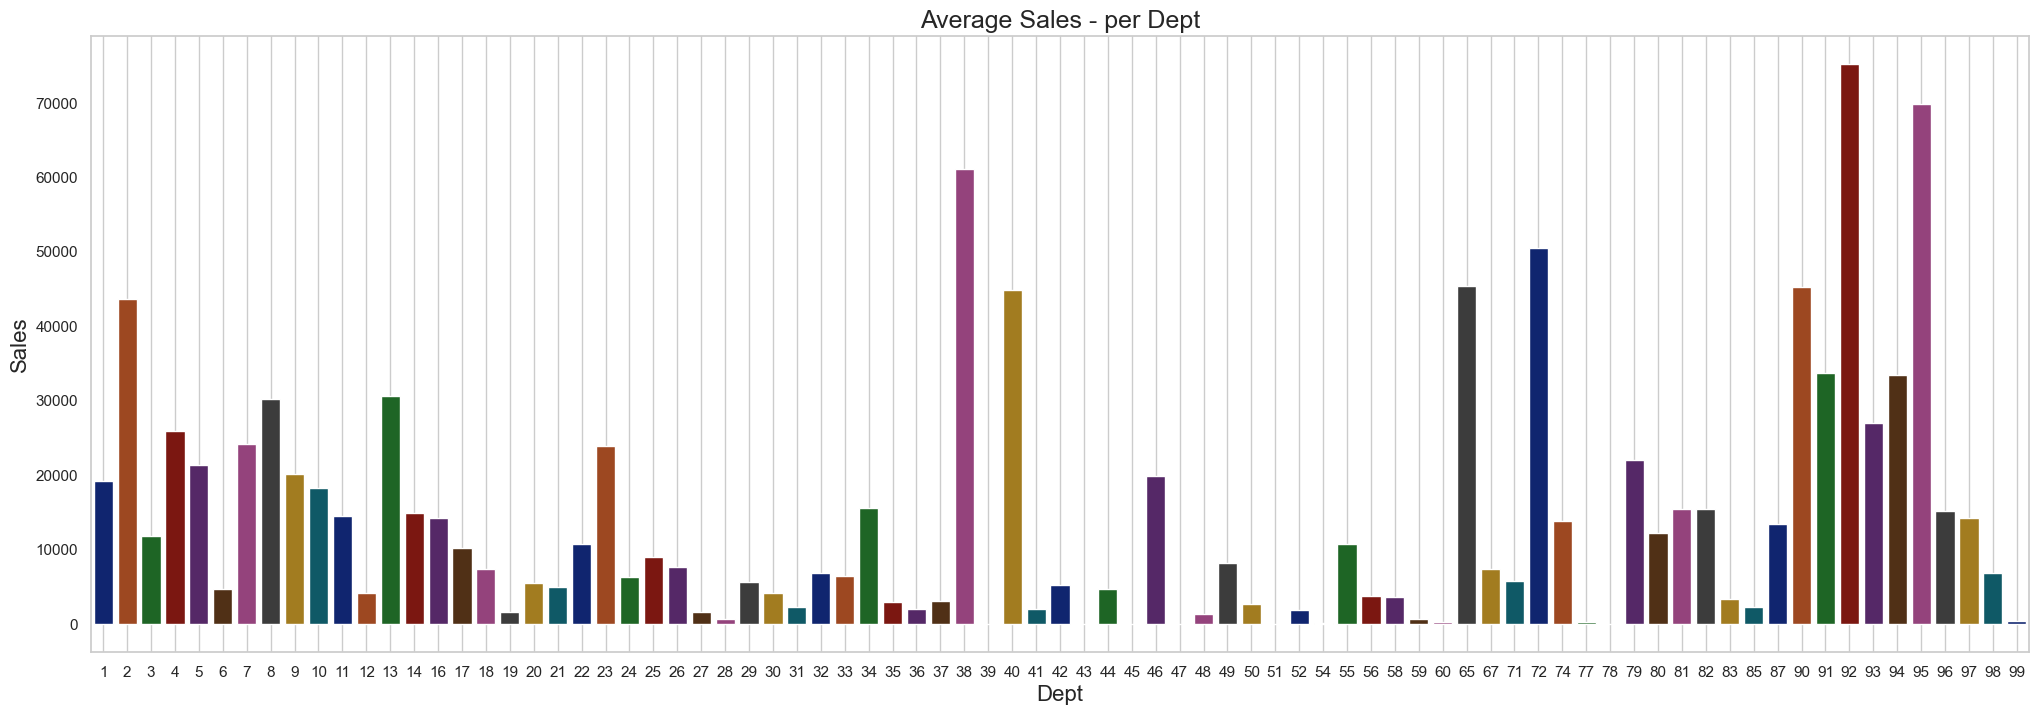

In [ ]:
df['Dept'] = df['Dept'].astype(int)
weekly_sales = df['Weekly_Sales'].groupby(df['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

In [ ]:
## Focus on store

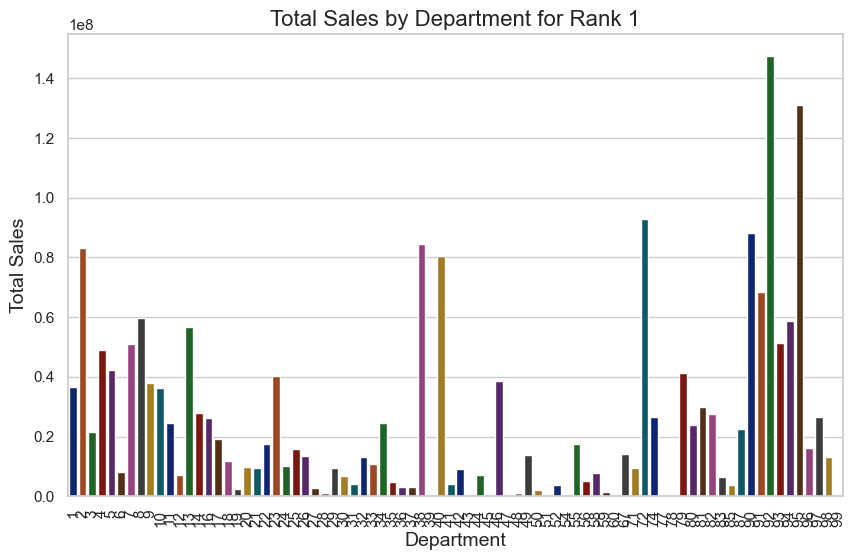

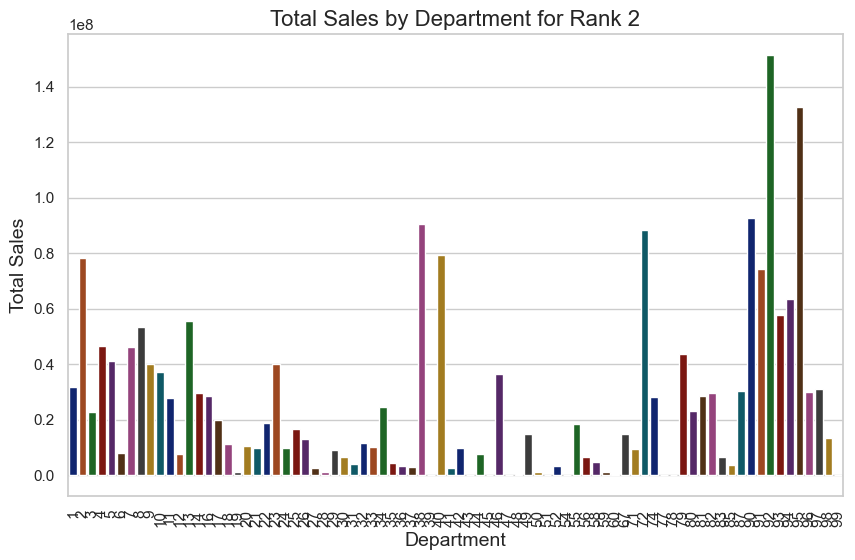

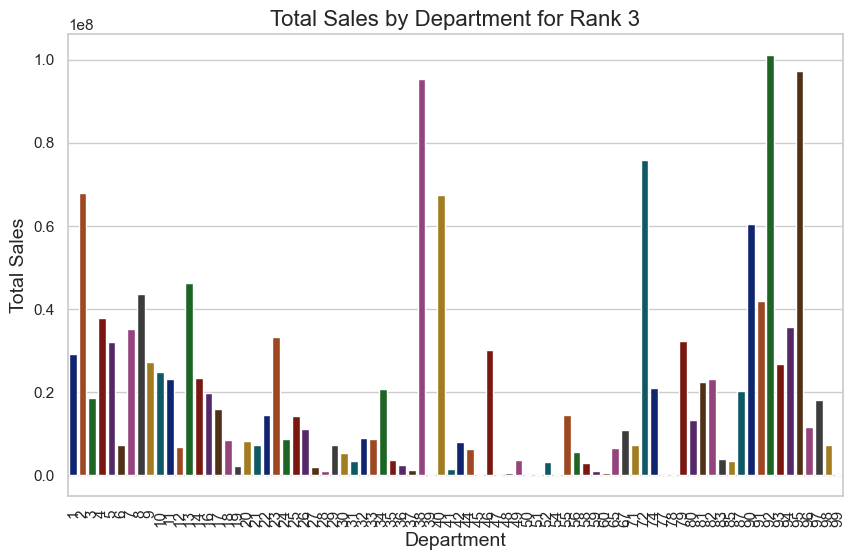

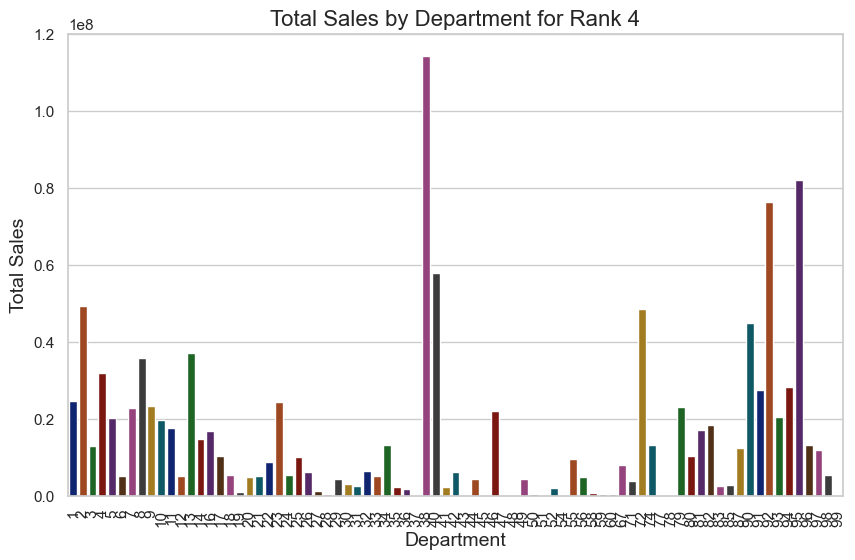

Dept
92    1.473429e+08
95    1.309301e+08
72    9.276201e+07
90    8.810979e+07
38    8.437765e+07
Name: Weekly_Sales, dtype: float64
Dept
92    1.513704e+08
95    1.326407e+08
90    9.253595e+07
38    9.037760e+07
72    8.844397e+07
Name: Weekly_Sales, dtype: float64
Dept
92    1.010533e+08
95    9.715835e+07
38    9.528296e+07
72    7.592500e+07
2     6.794291e+07
Name: Weekly_Sales, dtype: float64
Dept
38    1.143188e+08
95    8.209079e+07
92    7.656114e+07
40    5.801645e+07
2     4.947417e+07
Name: Weekly_Sales, dtype: float64


In [ ]:
# Load the dataset
stores = pd.read_csv('store.csv')

# Define your store ranks
rank_1 = [20, 4, 14, 13, 2, 10, 27]
rank_2 = [6, 1, 39, 19, 23, 31, 11, 24, 28, 41]
rank_3 = [32, 18, 22, 12, 26, 35, 40, 34, 43, 8, 17]
rank_4 = [45, 42, 21, 25, 37, 15, 9, 36, 7, 29, 16, 38, 3, 44, 33, 5]

# Function to analyze sales by department for a given set of stores
def analyze_sales_by_department(store_ranks, rank_name):
    # Filter the DataFrame for the stores in the given rank
    rank_df = df[stores['Store'].isin(store_ranks)]
    # df['Dept'] = df['Dept'].astype(int)
    weekly_sales = df['Weekly_Sales'].groupby(df['Dept']).mean()

    # Group by department and sum the sales
    department_sales = rank_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x=department_sales.index, y=department_sales.values, palette='dark')
    plt.title(f'Total Sales by Department for {rank_name}', fontsize=16)
    plt.ylabel('Total Sales', fontsize=14)
    plt.xlabel('Department', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()

    # Return the sorted sales by department
    return department_sales

# Analyze each rank
sales_by_dept_rank_1 = analyze_sales_by_department(rank_1, 'Rank 1')
sales_by_dept_rank_2 = analyze_sales_by_department(rank_2, 'Rank 2')
sales_by_dept_rank_3 = analyze_sales_by_department(rank_3, 'Rank 3')
sales_by_dept_rank_4 = analyze_sales_by_department(rank_4, 'Rank 4')

# You can print the top departments for each rank if you like
print(sales_by_dept_rank_1.head())
print(sales_by_dept_rank_2.head())
print(sales_by_dept_rank_3.head())
print(sales_by_dept_rank_4.head())

There are Sales difference between the Departments too. Also some Depts are not in the list, like number '15', for example.

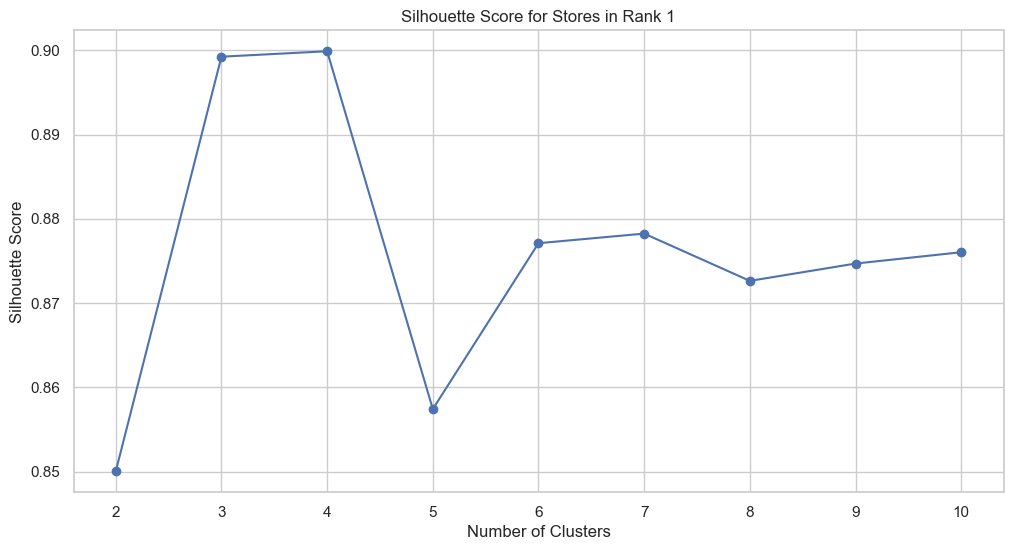

Optimal number of clusters for Rank 1: 4


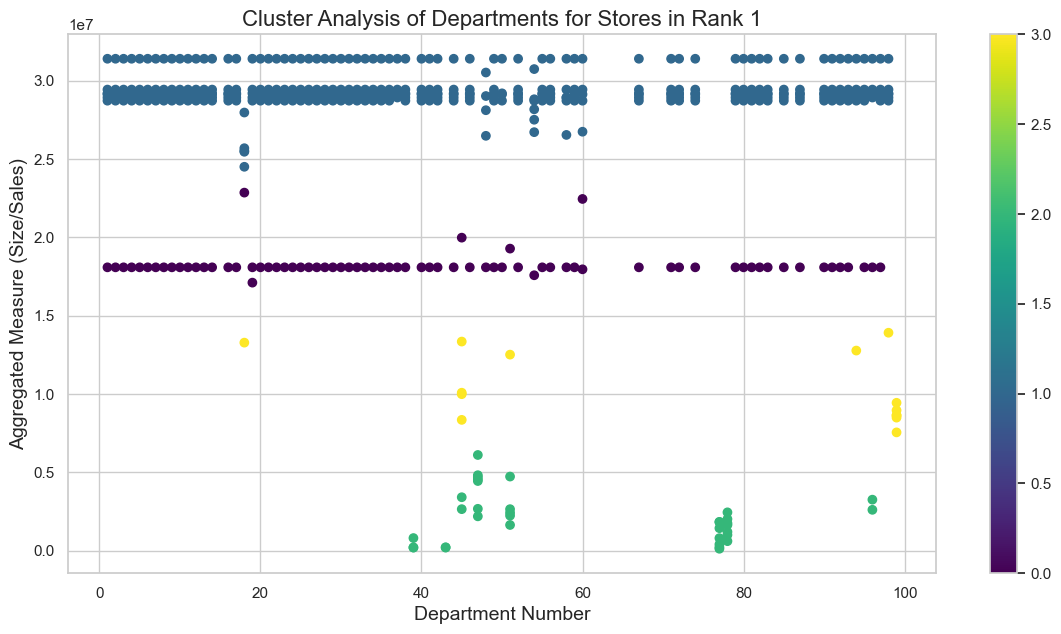

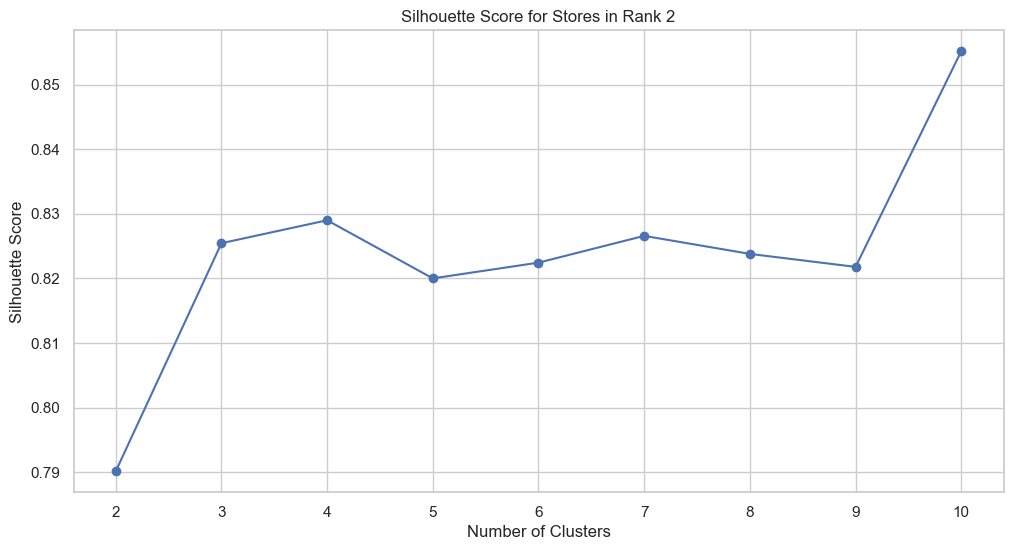

Optimal number of clusters for Rank 2: 10


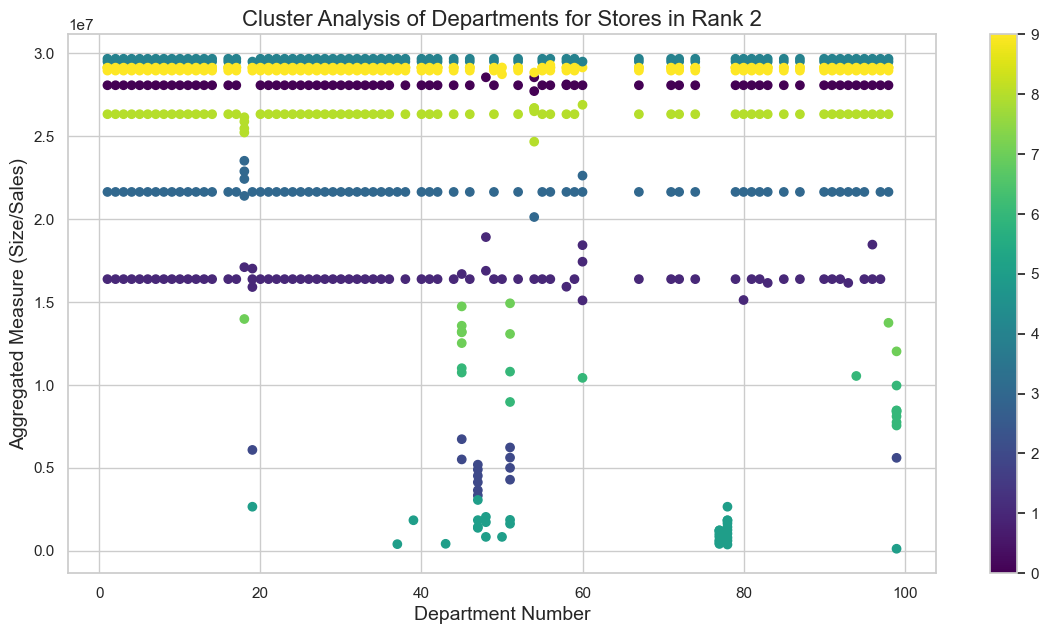

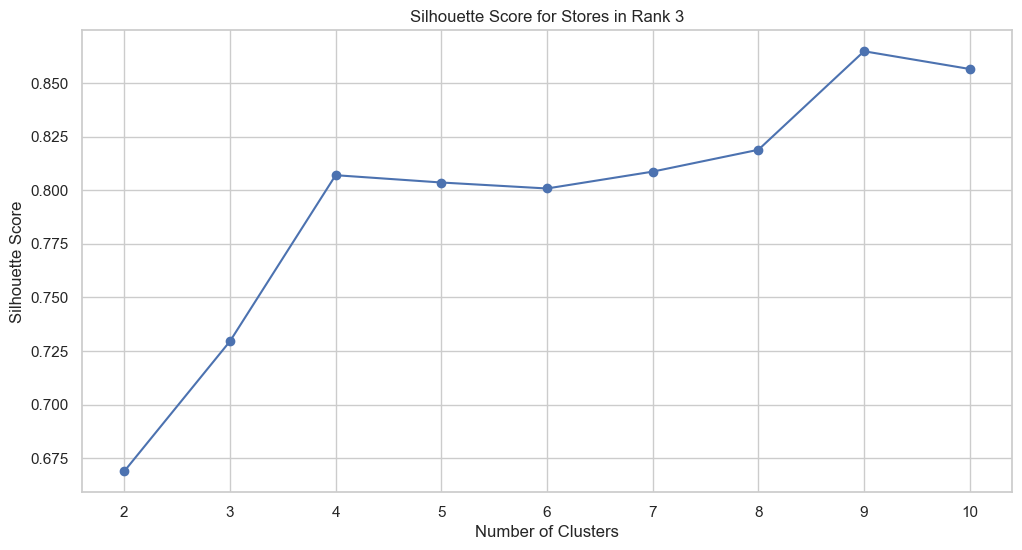

Optimal number of clusters for Rank 3: 9


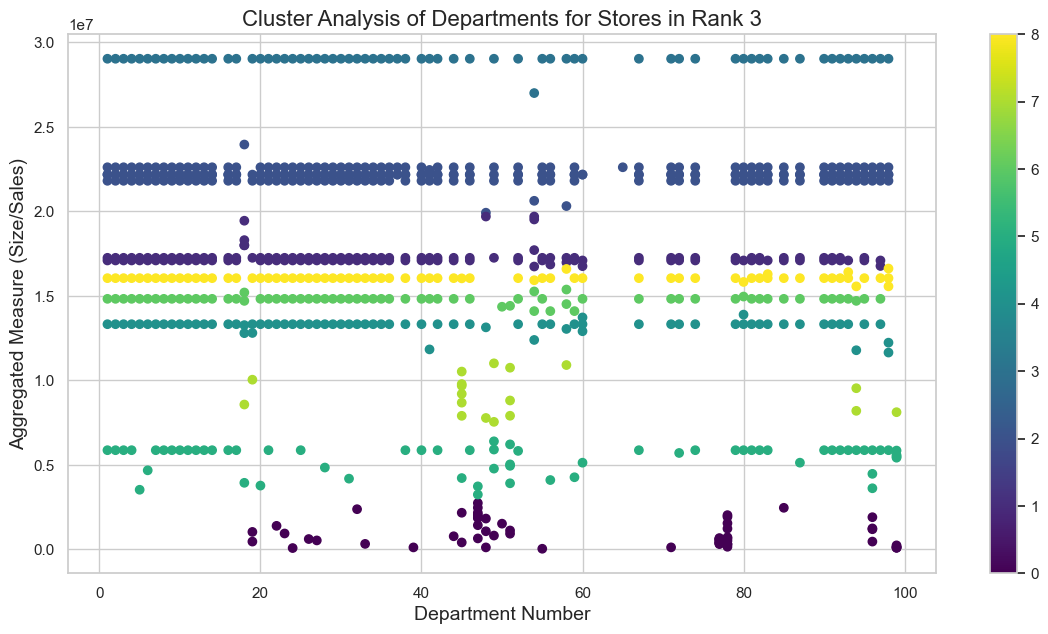

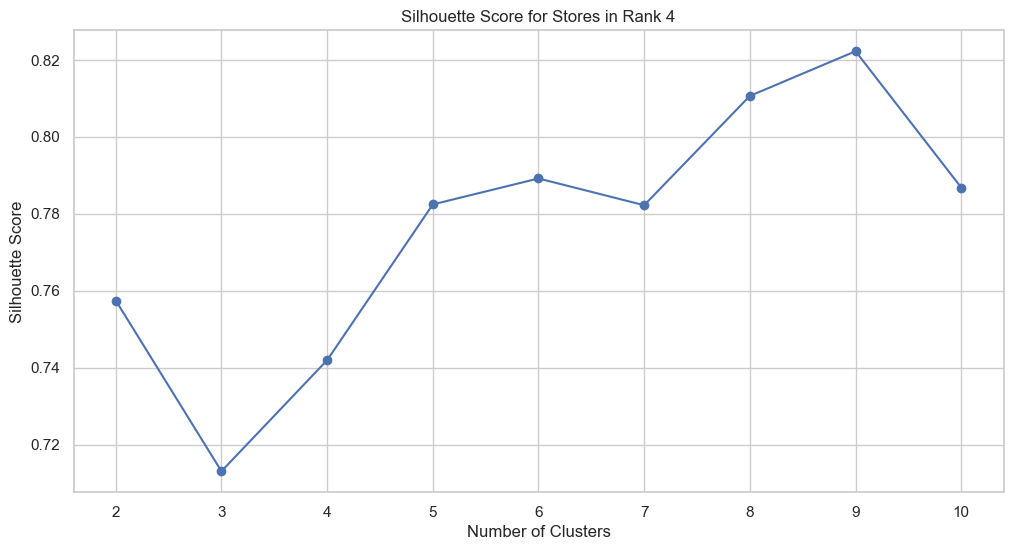

Optimal number of clusters for Rank 4: 9


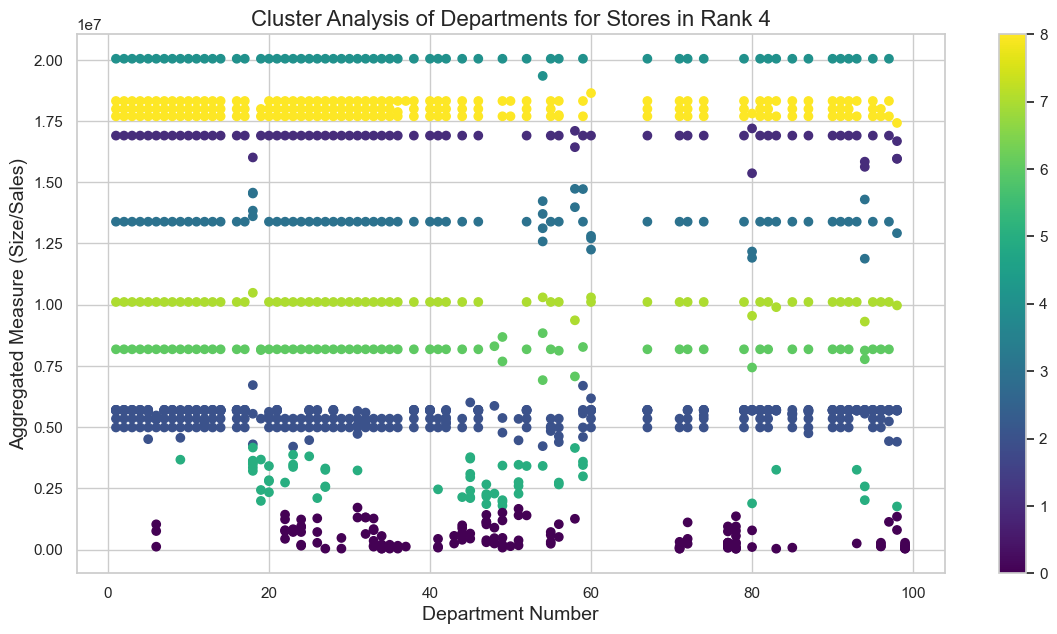

In [ ]:
# Load the 'stores' DataFrame, ensuring it has 'Store', 'Dept', and 'Size' columns.
# Here, 'Size' represents a quantifiable measure such as sales volume.

# Define your store ranks in a dictionary format.
ranks = {
    'Rank 1': [20, 4, 14, 13, 2, 10, 27],
    'Rank 2': [6, 1, 39, 19, 23, 31, 11, 24, 28, 41],
    'Rank 3': [32, 18, 22, 12, 26, 35, 40, 34, 43, 8, 17],
    'Rank 4': [45, 42, 21, 25, 37, 15, 9, 36, 7, 29, 16, 38, 3, 44, 33, 5]
}

# Prepare a dictionary to store the clustering results for each rank.
cluster_results = {}

# Iterate over each rank to perform clustering and determine the optimal number of clusters.
for rank_name, store_numbers in ranks.items():
    # Select data from the 'stores' DataFrame for the current rank of stores.
    rank_stores = stores[stores['Store'].isin(store_numbers)]

    # Group the data by 'Store' and 'Dept', summing up the 'Size' for each group.
    store_dept_group = rank_stores.groupby(['Store', 'Dept']).agg({'Size':'sum'}).reset_index()

    # Prepare features for clustering: 'Dept' and aggregated 'Size'.
    X = store_dept_group[['Dept', 'Size']]

    # Calculate silhouette scores for different numbers of clusters to find the optimal count.
    silhouette_scores = []
    for n_clusters in range(2, 11):  # Testing cluster counts from 2 to 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    # Plot the silhouette scores to visualize the optimal cluster count.
    plt.figure(figsize=(12, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title(f'Silhouette Score for Stores in {rank_name}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Choose the optimal number of clusters based on the highest silhouette score.
    optimal_n_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
    print(f'Optimal number of clusters for {rank_name}:', optimal_n_clusters)

    # Apply K-means clustering with the optimal number of clusters determined above.
    kmeans = KMeans(n_clusters=optimal_n_clusters)
    store_dept_group['Cluster'] = kmeans.fit_predict(X)

    # Visualize the clustering result with a scatter plot.
    plt.figure(figsize=(14, 7))
    plt.scatter(store_dept_group['Dept'], store_dept_group['Size'], c=store_dept_group['Cluster'], cmap='viridis')

    # Optionally, add a color bar to the plot to represent cluster colors.
    plt.colorbar()

    # Enhance plot readability with clear titles and labels.
    plt.title(f'Cluster Analysis of Departments for Stores in {rank_name}', fontsize=16)
    plt.xlabel('Department Number', fontsize=14)
    plt.ylabel('Aggregated Measure (Size/Sales)', fontsize=14)

    # Display the scatter plot.
    plt.show()

    # Store the clustering model and resulting data for each rank for further analysis.
    cluster_results[rank_name] = {
        'model': kmeans,
        'data': store_dept_group
    }


In [ ]:
# # One-hot encode the 'IsHoliday' column
# df = pd.get_dummies(df, columns=['IsHoliday'])

# # Automatically one-hot encode all columns of type 'object'
# df = pd.get_dummies(df, drop_first=True)

# Print the updated DataFrame
print(df.head())

        Date  Unnamed: 0  Store IsHoliday  Dept  Weekly_Sales  Temperature  \
0 2010-02-05           0      1         0     1      24924.50        42.31   
1 2010-02-05           1      1         0    26      11737.12        42.31   
2 2010-02-05           2      1         0    17      13223.76        42.31   
3 2010-02-05           3      1         0    45         37.44        42.31   
4 2010-02-05           4      1         0    28       1085.29        42.31   

   Fuel_Price  MarkDown1  MarkDown2  ...  MarkDown4  MarkDown5         CPI  \
0       2.572        0.0        0.0  ...        0.0        0.0  211.096358   
1       2.572        0.0        0.0  ...        0.0        0.0  211.096358   
2       2.572        0.0        0.0  ...        0.0        0.0  211.096358   
3       2.572        0.0        0.0  ...        0.0        0.0  211.096358   
4       2.572        0.0        0.0  ...        0.0        0.0  211.096358   

   Unemployment  Type    Size  Week  Year  Month  Size_Type  


#Test correlation towards weekly_sales with significance P values less than 0.05

In [ ]:
# Assuming 'df' is your DataFrame
variables = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
             'Week', 'Year', 'Month', 'Size_Type', 'IsHoliday', 'IsHoliday']

# Initialize a dictionary to store correlation coefficients and p-values
results = {}

for variable in variables:
    # Ensure the variable is numeric for correlation analysis
    if pd.api.types.is_numeric_dtype(df[variable]):
        corr_coef, p_value = stats.pearsonr(df['Weekly_Sales'], df[variable])
        results[variable] = (corr_coef, p_value)

# Filter results for significant correlations (p-value < 0.05)
significant_results = {var: (coef, p) for var, (coef, p) in results.items() if p < 0.05}

# Sort variables by the absolute value of their correlation coefficient, from highest to lowest
sorted_significant_results = sorted(significant_results.items(), key=lambda item: abs(item[1][0]), reverse=True)

print("Variables ranked by their correlation to Weekly_Sales (from highest to lowest, p < 0.05):")
for var, (coef, p) in sorted_significant_results:
    print(f"{var}: Correlation = {coef:.4f}, p-value = {p:.4g}")


Variables ranked by their correlation to Weekly_Sales (from highest to lowest, p < 0.05):
Size: Correlation = 0.2438, p-value = 0
Size_Type: Correlation = 0.2394, p-value = 0
Type: Correlation = 0.1822, p-value = 0
MarkDown5: Correlation = 0.0505, p-value = 8.989e-236
MarkDown1: Correlation = 0.0472, p-value = 3.06e-206
MarkDown3: Correlation = 0.0386, p-value = 1.884e-138
MarkDown4: Correlation = 0.0375, p-value = 8.292e-131
Month: Correlation = 0.0284, p-value = 5.266e-76
Week: Correlation = 0.0277, p-value = 3.269e-72
Unemployment: Correlation = -0.0259, p-value = 2.626e-63
CPI: Correlation = -0.0209, p-value = 4.893e-42
MarkDown2: Correlation = 0.0207, p-value = 2.985e-41
Year: Correlation = -0.0101, p-value = 5.192e-11


1. Size and Size_Type have the highest correlation coefficients with Weekly_Sales, suggesting that larger store sizes and some interaction between Size and Type (perhaps a computed feature) are positively associated with higher weekly sales.

2. Type also shows a significant positive correlation, indicating that different store types might have different sales performances, with some types possibly being larger or having characteristics that favor higher sales.

3. MarkDown features (1 through 5) show positive but relatively weaker correlations with Weekly_Sales. This suggests that markdowns may have some influence on increasing sales, but the effect is not as strong as Size or Type. It's interesting to note that MarkDown5 has the highest correlation among markdowns, which might indicate its particular effectiveness or different application compared to others.

4. Month and Week have small positive correlations, indicating slight seasonal or weekly patterns in sales, though the influence is not as strong as factors like store size.

5. Unemployment and CPI (Consumer Price Index) show small negative correlations with Weekly_Sales, suggesting that higher unemployment rates and higher CPI (indicative of higher prices or inflation) are slightly associated with lower weekly sales.

6. IsHoliday_0 and IsHoliday_1 (likely indicating non-holiday and holiday weeks, respectively) show a very small positive correlation for IsHoliday_1 and a small negative correlation for IsHoliday_0 with Weekly_Sales, indicating a minor influence of holidays on sales.

7. Year shows a very small negative correlation, suggesting a slight decrease in sales over the years covered by the dataset.

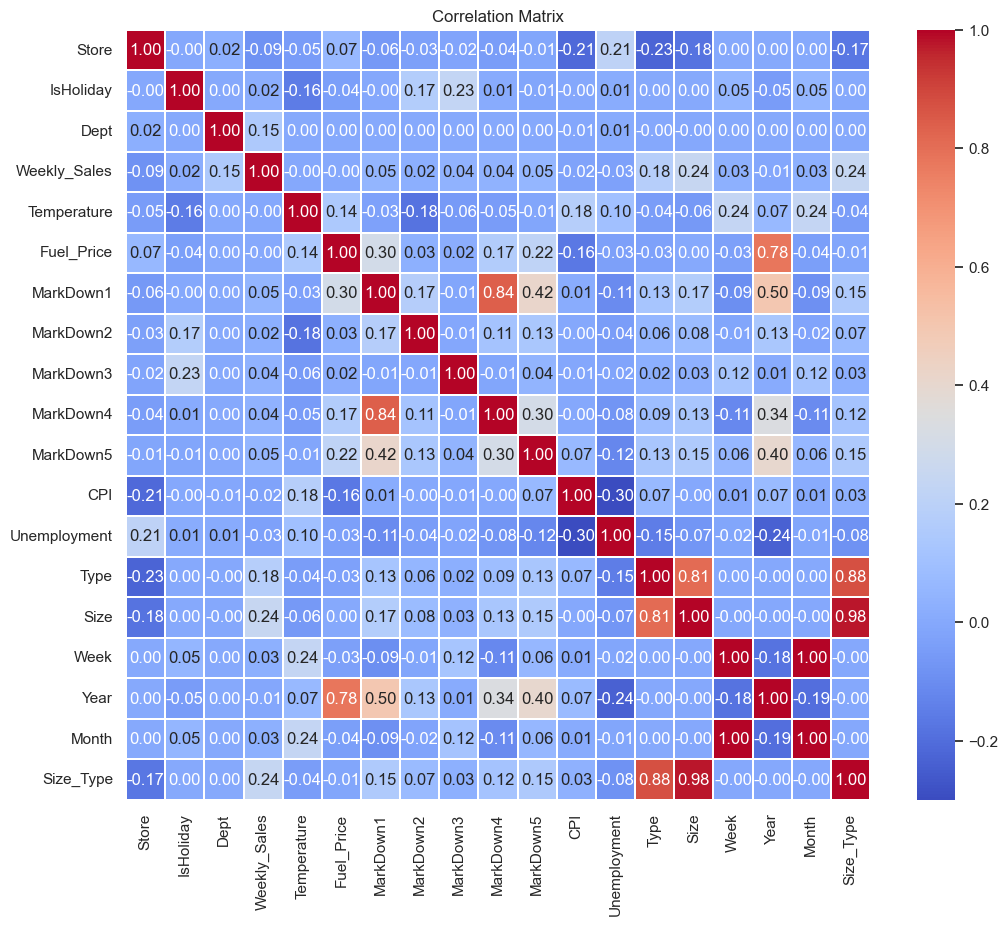

In [ ]:
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)  # Safely remove the 'Unnamed: 0' column if it exists

df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime type

# Note: .week has been deprecated in favor of .isocalendar().week in newer versions of pandas
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

df.set_index('Date', inplace=True)  # Set the 'Date' column as the index of the dataframe

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()


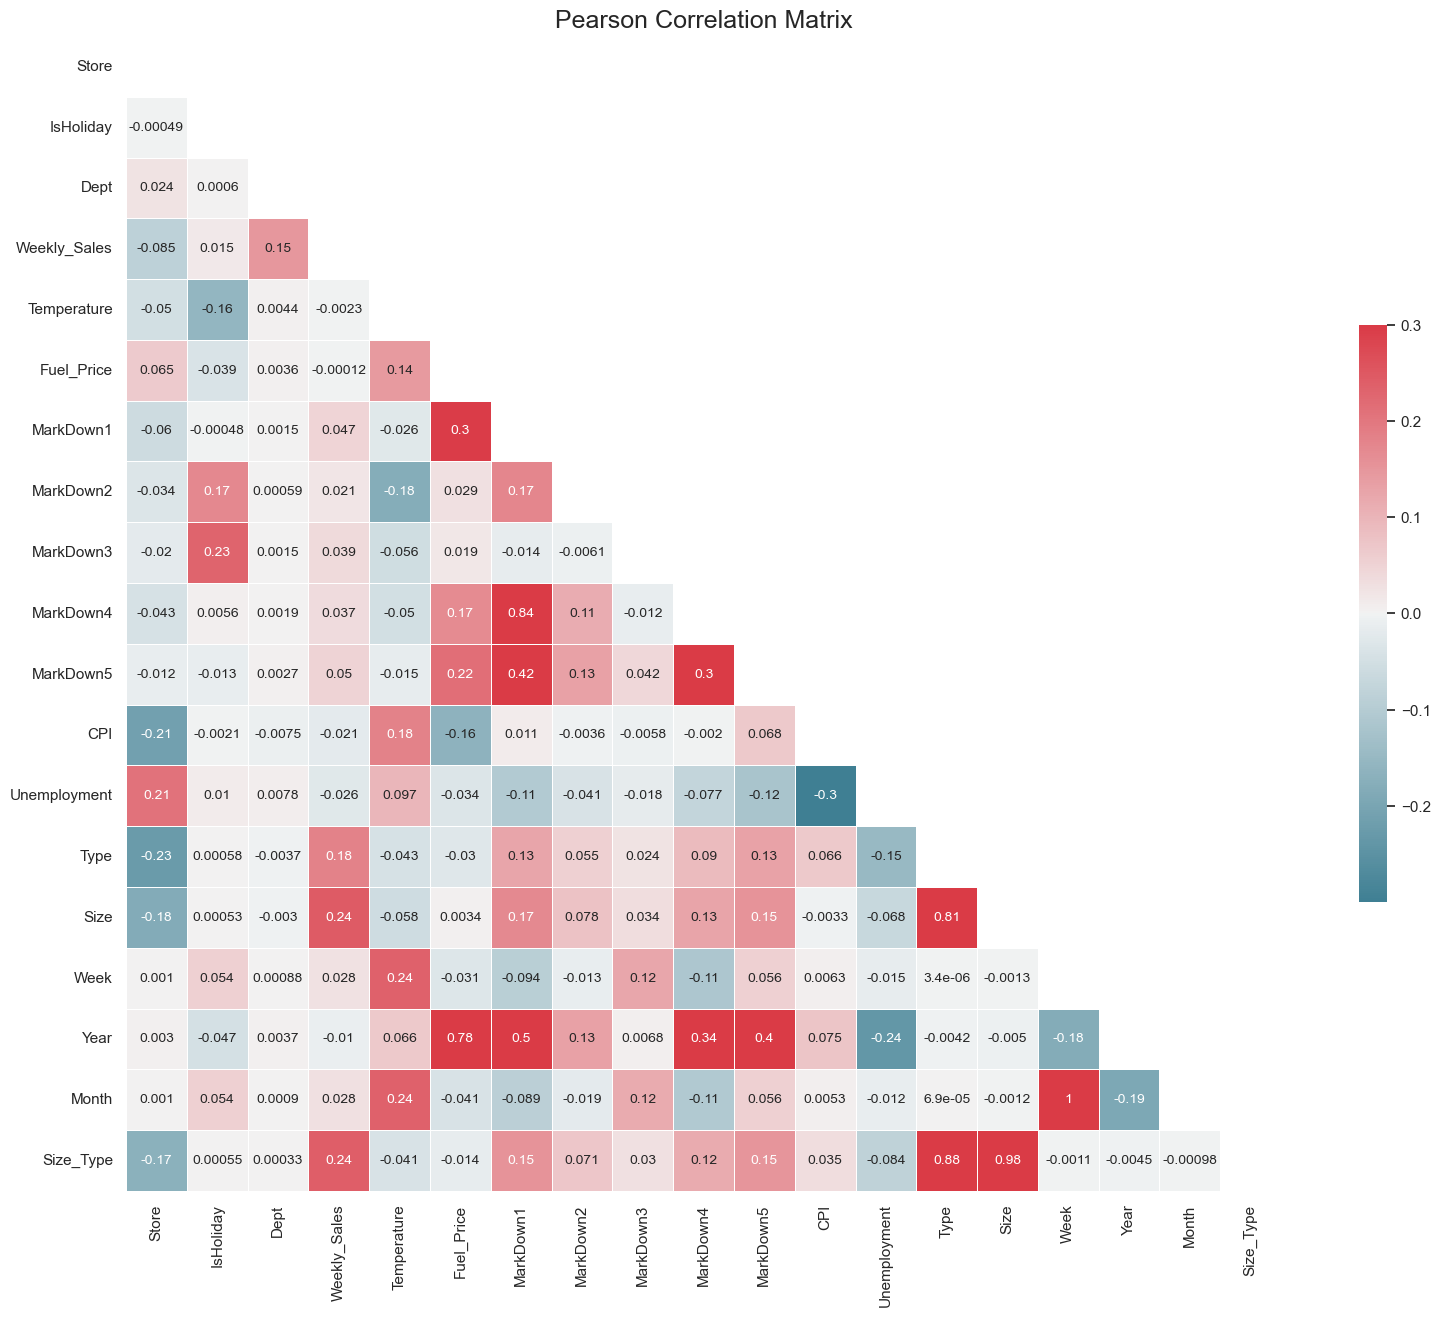

In [ ]:
sns.set(style="white")

# Calculate the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             # square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 10})  # Adjust size as needed


plt.title('Pearson Correlation Matrix', fontsize=18)
plt.show()


On the Pearson correlation matrix it shows that
> 'MarkDown' 1 to 5 have very weak correlation to 'Weekly_Sales' and they have a lot of null values.

> Other variables that have weak correlation with 'Weekly_Sales' can be analyzed to see if they are useful.

> Based on this graph it supported our analysis where store_size, size, and type have the highest correlation to our 'weekly_sales'

In [ ]:
df.corr()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month,Size_Type
Store,1.000000,-0.000490,0.024004,-0.085195,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.226410,-0.182881,0.001031,0.002997,0.001011,-0.170219
IsHoliday,-0.000490,1.000000,0.000601,0.015168,-0.155189,-0.039219,-0.000484,0.171598,0.230412,0.005598,-0.012765,-0.002056,0.010094,0.000579,0.000526,0.054338,-0.047117,0.054233,0.000552
Dept,0.024004,0.000601,1.000000,0.148032,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,-0.003708,-0.002966,0.000882,0.003738,0.000904,0.000332
Weekly_Sales,-0.085195,0.015168,0.148032,1.000000,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.182242,0.243828,0.027673,-0.010111,0.028409,0.239408
Temperature,-0.050097,-0.155189,0.004437,-0.002312,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.042981,-0.058313,0.236276,0.065814,0.235983,-0.041424
Fuel_Price,0.065290,-0.039219,0.003572,-0.000120,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,-0.029687,0.003361,-0.031140,0.779633,-0.040876,-0.014363
MarkDown1,-0.059844,-0.000484,0.001494,0.047172,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,0.126345,0.169788,-0.093572,0.501044,-0.089206,0.154183
MarkDown2,-0.033829,0.171598,0.000587,0.020716,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.055318,0.078372,-0.012812,0.131867,-0.019360,0.071172
MarkDown3,-0.020331,0.230412,0.001475,0.038562,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.024013,0.033641,0.122323,0.006789,0.116031,0.030096
MarkDown4,-0.042724,0.005598,0.001937,0.037467,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.089770,0.127334,-0.114168,0.335340,-0.105569,0.115038


> Correlation Metrics:
    >* 0: no correlation at all
    >* 0-0.3: weak correlation
    >* 0.3-0.7: moderate correlaton
    >* 0.7-1: strong correlation

> Positive Correlation indicates that when one variable increase, the other also does. Negative is the opposite.

#Analyze variable

In [ ]:
def make_discrete_plot(feature):
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1,2)
    ax1 = fig.add_subplot(gs[0,0])
    sns.boxplot(y=df.Weekly_Sales, x=df[feature], ax=ax1)
    ax1.set_ylabel('Sales', fontsize=16)
    ax1.set_xlabel(feature, fontsize=16)

    ax2 = fig.add_subplot(gs[0,1])
    sns.stripplot(y=df.Weekly_Sales, x=df[feature], ax=ax2)
    ax2.set_ylabel('Sales', fontsize=16)
    ax2.set_xlabel(feature, fontsize=16)

    plt.show()

In [ ]:
# from scipy.special import boxcox1p
# from scipy.stats import skew
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
# import seaborn as sns
# import numpy as np

# def make_continuous_plot(feature):
#     # Transform feature once
#     transformed_015 = boxcox1p(df[feature], 0.15)
#     transformed_025 = boxcox1p(df[feature], 0.25)

#     # Calculate correlation and skewness once
#     corr_015 = np.round(df['Weekly_Sales'].corr(transformed_015), 2)
#     skew_015 = np.round(skew(transformed_015, nan_policy='omit'), 2)
#     corr_025 = np.round(df['Weekly_Sales'].corr(transformed_025), 2)
#     skew_025 = np.round(skew(transformed_025, nan_policy='omit'), 2)

#     # Setup figure and subplots
#     fig = plt.figure(figsize=(18,15))
#     gs = GridSpec(2,2)

#     ax1 = fig.add_subplot(gs[0,1])
#     sns.scatterplot(y=df['Weekly_Sales'], x=transformed_015, ax=ax1, color='blue')
#     ax1.set_title(f'BoxCox 0.15\nCorr: {corr_015}, Skew: {skew_015}')

#     ax2 = fig.add_subplot(gs[1,0])
#     sns.scatterplot(y=df['Weekly_Sales'], x=transformed_025, ax=ax2, color='blue')
#     ax2.set_title(f'BoxCox 0.25\nCorr: {corr_025}, Skew: {skew_025}')

#     ax3 = fig.add_subplot(gs[1,1])
#     sns.distplot(df[feature], ax=ax3, color='green')
#     ax3.set_title('Distribution\n')

#     ax4 = fig.add_subplot(gs[0,0])
#     sns.scatterplot(y=df['Weekly_Sales'], x=df[feature], ax=ax4, color='red')
#     ax4.set_title(f'Linear\nCorr: {df["Weekly_Sales"].corr(df[feature])}, Skew: {skew(df[feature], nan_policy="omit")}')

#     plt.show()

In [ ]:
# if 'Type' in df.columns:
#     make_discrete_plot('Type')
#     make_continuous_plot('Type')
# else:
#     print("'Type' column not found in the DataFrame.")

In [ ]:
# if 'Temperature' in df.columns:
#     make_discrete_plot('Temperature')
# else:
#     print("'Temperature' column not found in the DataFrame.")

In [ ]:
# if 'Size' in df.columns:
#     make_continuous_plot('Size')
#     make_discrete_plot('Size')
# else:
#     print("'Size' column not found in the DataFrame.")

In [ ]:
#Size has moderate correlation with 'WeeklySales'.

In [ ]:
#Spliting data to Test, Train, and Validation set

In [ ]:
print(df.columns)

Index(['Store', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year',
       'Month', 'Size_Type'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# # Define features and target variables
# X = df[['Store', 'Dept', 'Temperature', 'Fuel_Price',
#        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
#        'Unemployment', 'Type', 'Size', 'Week', 'Year', 'Month', 'Size_Type',
#        'IsHoliday_0', 'IsHoliday_1']]  # these all the features

X = df[['Store','Dept','IsHoliday', 'Size','Week','Type','Year']] #these are the relevant features
Y = df['Weekly_Sales']  # your target column

# First split: Splitting into training set and temp set (which will become validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, train_size=0.8, random_state=42)

# Second split: Splitting the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)

# Now you have your sets:
# Training set: X_train, y_train
# Validation set: X_val, y_val
# Test set: X_test, y_test


In [ ]:
X_train, X_temp, y_train, y_temp

(            Store  Dept IsHoliday    Size  Week  Type  Year
 Date                                                       
 2010-03-05     15    31         0  123737     9     2  2010
 2011-02-18     30    32         0   42988     7     1  2011
 2011-01-21      6     1         0  202505     3     3  2011
 2011-10-21     21    17         0  140167    42     2  2011
 2011-11-25     24    27         1  203819    47     3  2011
 ...           ...   ...       ...     ...   ...   ...   ...
 2010-10-01     27    97         0  204184    39     3  2010
 2011-05-27     39     7         0  184109    21     3  2011
 2011-02-18     14     1         0  200898     7     3  2011
 2012-07-06     15    42         0  123737    27     2  2012
 2011-03-25     13    54         0  219622    12     3  2011
 
 [337256 rows x 7 columns],
             Store  Dept IsHoliday    Size  Week  Type  Year
 Date                                                       
 2011-07-15     28    29         0  206302    28     3 

In [ ]:
#> As we can see in the figure below, the evaluation is based on Weighted Mean Absolute Error (WMAE), with a weight of 5 for Holiday Weeks and 1 otherwise.

In [ ]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [ ]:
def random_forest(n_estimators, max_depth, X_train, y_train, X_temp, y_temp):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', n_estimators:', estimator, ', max_depth:', depth)
                # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_temp)
                wmaes_cv.append(WMAE(X_temp, y_temp, predicted))
            print('WMAE:', np.mean(wmaes_cv))
            result.append({'Max_Depth': depth, 'Estimators': estimator, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [ ]:
def random_forest_II(n_estimators, max_depth, max_features, X_train, y_train, X_temp, y_temp):
    result = []
    for feature in max_features:
        wmaes_cv = []
        for i in range(1,5):
            print('k:', i, ', max_features:', feature)
            # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
            RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=feature)
            RF.fit(X_train, y_train)
            predicted = RF.predict(X_temp)
            wmaes_cv.append(WMAE(X_temp, y_temp, predicted))
        print('WMAE:', np.mean(wmaes_cv))
        result.append({'Max_Feature': feature, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [ ]:
def random_forest_III(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, X_train, y_train, X_temp, y_temp):
    result = []
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', min_samples_split:', split, ', min_samples_leaf:', leaf)
                # x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
                                           min_samples_leaf=leaf, min_samples_split=split)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_temp)
                wmaes_cv.append(WMAE(X_temp, y_temp, predicted))
            print('WMAE:', np.mean(wmaes_cv))
            result.append({'Min_Samples_Leaf': leaf, 'Min_Samples_Split': split, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [ ]:
n_estimators = [56, 58, 60]
max_depth = [25, 27, 30]

random_forest(n_estimators, max_depth, X_train, y_train, X_temp, y_temp)

k: 1 , n_estimators: 56 , max_depth: 25
k: 2 , n_estimators: 56 , max_depth: 25
k: 3 , n_estimators: 56 , max_depth: 25
k: 4 , n_estimators: 56 , max_depth: 25
WMAE: 1502.6525000000001
k: 1 , n_estimators: 56 , max_depth: 27
k: 2 , n_estimators: 56 , max_depth: 27
k: 3 , n_estimators: 56 , max_depth: 27
k: 4 , n_estimators: 56 , max_depth: 27
WMAE: 1505.6399999999999
k: 1 , n_estimators: 56 , max_depth: 30
k: 2 , n_estimators: 56 , max_depth: 30
k: 3 , n_estimators: 56 , max_depth: 30
k: 4 , n_estimators: 56 , max_depth: 30
WMAE: 1504.985
k: 1 , n_estimators: 58 , max_depth: 25
k: 2 , n_estimators: 58 , max_depth: 25
k: 3 , n_estimators: 58 , max_depth: 25
k: 4 , n_estimators: 58 , max_depth: 25
WMAE: 1504.77
k: 1 , n_estimators: 58 , max_depth: 27
k: 2 , n_estimators: 58 , max_depth: 27
k: 3 , n_estimators: 58 , max_depth: 27
k: 4 , n_estimators: 58 , max_depth: 27
WMAE: 1499.83
k: 1 , n_estimators: 58 , max_depth: 30
k: 2 , n_estimators: 58 , max_depth: 30
k: 3 , n_estimators: 58 , m

,Max_Depth,Estimators,WMAE
0,25,56,1502.6525
1,27,56,1505.6400
2,30,56,1504.9850
3,25,58,1504.7700
4,27,58,1499.8300
5,30,58,1506.6950
6,25,60,1505.1725
7,27,60,1500.6675
8,30,60,1500.2900


In [ ]:
max_features = [2, 3, 4, 5, 6, 7]

random_forest_II(n_estimators=58, max_depth=27, max_features=max_features, X_train=X_train, y_train=y_train, X_temp=X_temp, y_temp=y_temp)

k: 1 , max_features: 2
k: 2 , max_features: 2
k: 3 , max_features: 2
k: 4 , max_features: 2
WMAE: 4491.2675
k: 1 , max_features: 3
k: 2 , max_features: 3
k: 3 , max_features: 3
k: 4 , max_features: 3
WMAE: 2592.145
k: 1 , max_features: 4
k: 2 , max_features: 4
k: 3 , max_features: 4
k: 4 , max_features: 4
WMAE: 1748.905
k: 1 , max_features: 5
k: 2 , max_features: 5
k: 3 , max_features: 5
k: 4 , max_features: 5
WMAE: 1537.6299999999999
k: 1 , max_features: 6
k: 2 , max_features: 6
k: 3 , max_features: 6
k: 4 , max_features: 6
WMAE: 1504.4325000000001
k: 1 , max_features: 7
k: 2 , max_features: 7
k: 3 , max_features: 7
k: 4 , max_features: 7
WMAE: 1502.34


,Max_Feature,WMAE
0,2,4491.2675
1,3,2592.1450
2,4,1748.9050
3,5,1537.6300
4,6,1504.4325
5,7,1502.3400


In [ ]:
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]

random_forest_III(n_estimators=58, max_depth=27, max_features=6,
                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,  X_train=X_train, y_train=y_train, X_temp=X_temp, y_temp=y_temp)

k: 1 , min_samples_split: 2 , min_samples_leaf: 1
k: 2 , min_samples_split: 2 , min_samples_leaf: 1
k: 3 , min_samples_split: 2 , min_samples_leaf: 1
k: 4 , min_samples_split: 2 , min_samples_leaf: 1
WMAE: 1507.855
k: 1 , min_samples_split: 2 , min_samples_leaf: 2
k: 2 , min_samples_split: 2 , min_samples_leaf: 2
k: 3 , min_samples_split: 2 , min_samples_leaf: 2
k: 4 , min_samples_split: 2 , min_samples_leaf: 2
WMAE: 1559.34
k: 1 , min_samples_split: 2 , min_samples_leaf: 3
k: 2 , min_samples_split: 2 , min_samples_leaf: 3
k: 3 , min_samples_split: 2 , min_samples_leaf: 3
k: 4 , min_samples_split: 2 , min_samples_leaf: 3
WMAE: 1610.3275
k: 1 , min_samples_split: 3 , min_samples_leaf: 1
k: 2 , min_samples_split: 3 , min_samples_leaf: 1
k: 3 , min_samples_split: 3 , min_samples_leaf: 1
k: 4 , min_samples_split: 3 , min_samples_leaf: 1
WMAE: 1502.8874999999998
k: 1 , min_samples_split: 3 , min_samples_leaf: 2
k: 2 , min_samples_split: 3 , min_samples_leaf: 2
k: 3 , min_samples_split: 3 , 

,Min_Samples_Leaf,Min_Samples_Split,WMAE
0,1,2,1507.8550
1,2,2,1559.3400
2,3,2,1610.3275
3,1,3,1502.8875
4,2,3,1561.7025
5,3,3,1613.4000
6,1,4,1515.4150
7,2,4,1560.0325
8,3,4,1613.7675


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def train_regression_model(model, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics for regression
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('R2: ', r2)

    # Scatter plot for actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line for perfect predictions
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

    # Return the model and evaluation metrics
    return model, mse, rmse, mae, r2


In [ ]:
RF = RandomForestRegressor(n_estimators=56, max_depth=27, max_features=5, min_samples_split=3, min_samples_leaf=1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=27, max_features=5, min_samples_split=3,
                      n_estimators=56)

MSE:  10985890.396780385
RMSE:  3314.497005094496
MAE:  1362.3069476524934
R2:  0.9791485776196501


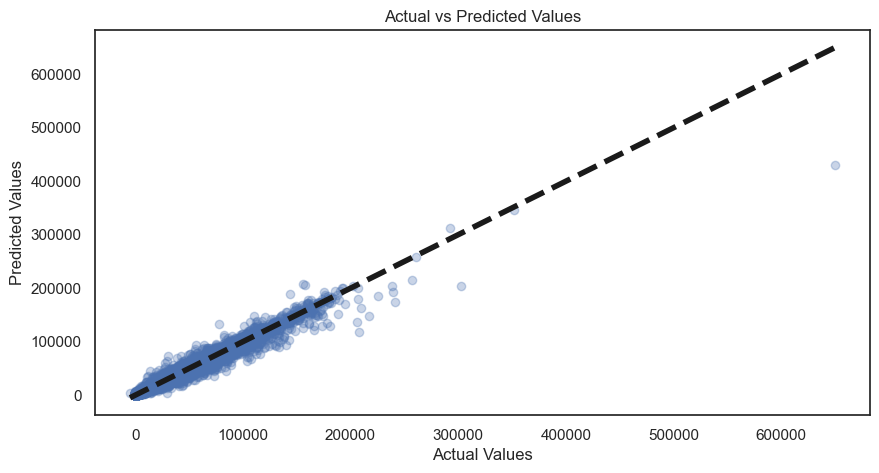

In [ ]:
# Create and train the RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators=56, max_depth=27, max_features=5, min_samples_split=3, min_samples_leaf=1)
model, mse, rmse, mae, r2 = train_regression_model(RF_regressor, X_train, y_train, X_test, y_test)

In [ ]:
# Predicting on the validation set
y_val_pred = RF.predict(X_val)

# Incorporating IsHoliday information into the validation set for WMAE calculation
# Assuming that the 'IsHoliday' feature is part of X_val, if not you might need to adjust this part
# Note: The actual implementation might need adjustments based on your DataFrame structure
X_val_with_holiday = X_val.copy()
X_val_with_holiday['IsHoliday'] = df.loc[X_val.index, 'IsHoliday'] if 'IsHoliday' not in X_val else X_val['IsHoliday']

# Evaluating model performance on the validation set using WMAE
validation_wmae = WMAE(X_val_with_holiday, y_val, y_val_pred)
print(f'Validation WMAE: {validation_wmae}')

Validation WMAE: 1581.28


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Example of loading your training data
# df_train = pd.read_csv('path_to_your_train_data.csv')
# X_train = df_train[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
# y_train = df_train['Weekly_Sales']

# Initialize and train the RandomForestRegressor
RF = RandomForestRegressor(n_estimators=56, max_depth=27, max_features=5, min_samples_split=3, min_samples_leaf=1)
RF.fit(X_train, y_train)  # Make sure X_train and y_train are properly preprocessed and do not contain NaN values

# Load the test dataset
df_test = pd.read_csv('/Users/wilbertlimson/Desktop/MacBOOk/OM441/testWalmartProject.csv')
X_df_test = df_test[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]

# Predict on the test set using the trained model
y_test_pred = RF.predict(X_df_test)

# Show predictions to verify
print(y_test_pred)


[26337.02664286 10624.90461012  9399.15306548 ...  3071.47226225
   746.58040306   880.91457738]


In [ ]:
# Add predictions back to df_test for a complete dataset
df_test['Weekly_Sales'] = y_test_pred

# Create a submission DataFrame including 'Year'
submission = df_test[['Store', 'Dept', 'Week', 'Weekly_Sales', 'Year']]

# Verify contents before saving
print(submission.head())

# Save the DataFrame to a CSV file
submission.to_csv('/Users/wilbertlimson/Desktop/MacBOOk/OM441/submission.csv', index=False)

# Confirming file creation
print("The submission.csv file has been created.")

   Store  Dept  Week  Weekly_Sales  Year
0      1   1.0     5  26337.026643  2010
1      1  26.0     5  10624.904610  2010
2      1  17.0     5   9399.153065  2010
3      1  45.0     5     36.669932  2010
4      1  28.0     5   1056.116119  2010
The submission.csv file has been created.


In [ ]:
df_sub = pd.read_csv('/Users/wilbertlimson/Desktop/MacBOOk/OM441/submission.csv')

In [ ]:
df_sub.head()

,Store,Dept,Week,Weekly_Sales,Year
0,1,1.0,5,26337.026643,2010
1,1,26.0,5,10624.904610,2010
2,1,17.0,5,9399.153065,2010
3,1,45.0,5,36.669932,2010
4,1,28.0,5,1056.116119,2010


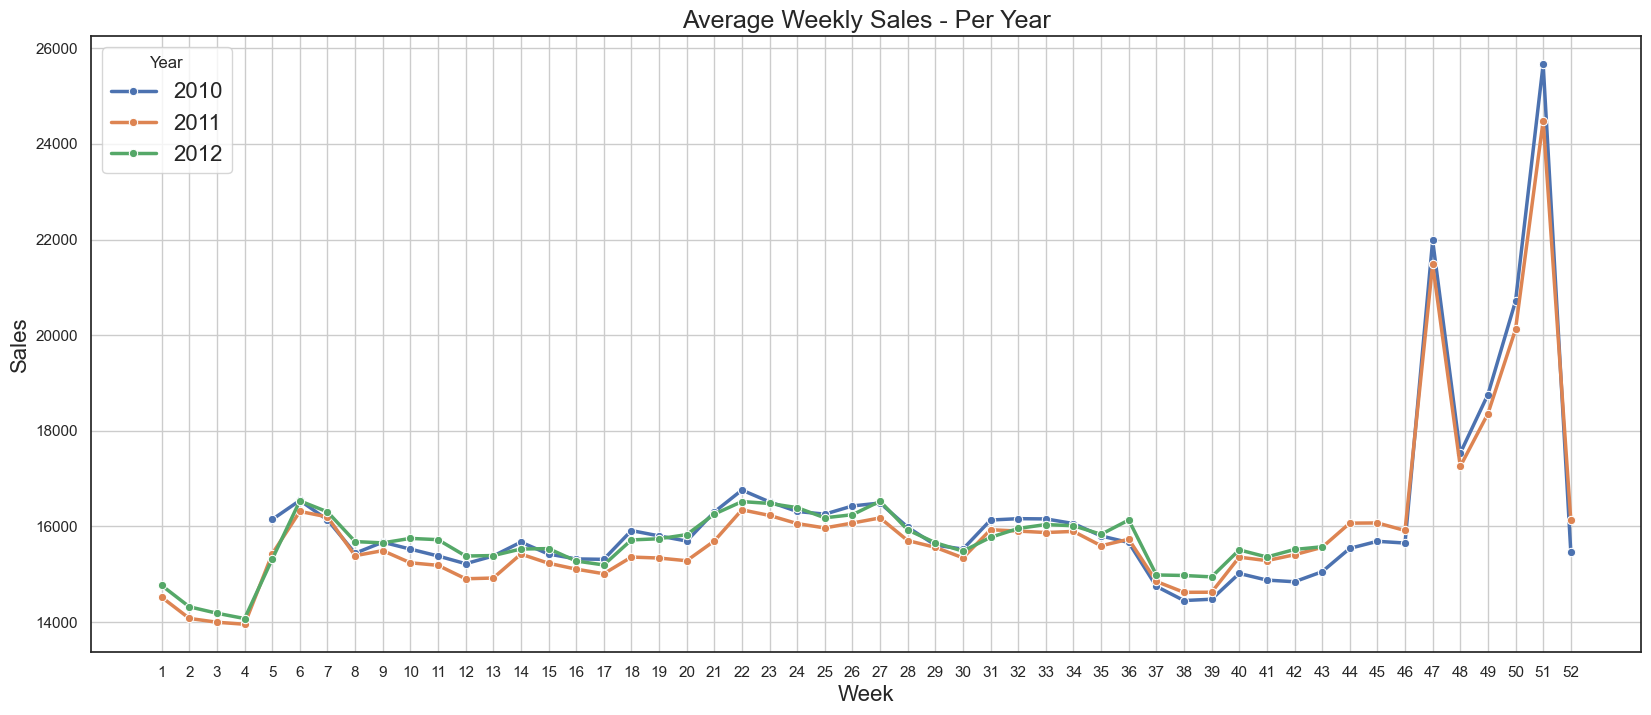

In [ ]:
# Group by 'Year' and 'Week' directly, ensuring the grouping keys are clear and lead to a unique index
weekly_sales_2010 = df_sub[df_sub['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = df_sub[df_sub['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = df_sub[df_sub['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(20, 8))

# Use 'linewidth' instead of 'size' to adjust the line width
sns.lineplot(data=weekly_sales_2010, marker='o', label='2010', linewidth=2.5)
sns.lineplot(data=weekly_sales_2011, marker='o', label='2011', linewidth=2.5)
sns.lineplot(data=weekly_sales_2012, marker='o', label='2012', linewidth=2.5)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(title='Year', loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
import pandas as pd
from pandasql import sqldf

# Set up the pysqldf function to use globals() to access the DataFrame
pysqldf = lambda q: sqldf(q, globals())

# # Example DataFrame 'Final'
# # Make sure this DataFrame is properly defined in your environment
# # Here's a simple example setup:
# data = {
#     'Store': [1, 1, 1, 1],
#     'Dept': [1, 1, 1, 1],
#     'Week': [51, 52, 53, 54],
#     'Weekly_Sales': [200, 150, 300, 250]
# }
Final = pd.DataFrame(df)

# SQL query adjusted for potential common errors
Final_adj = pysqldf("""
    SELECT
        Store,
        Dept,
        Week,
        Weekly_Sales,
        CASE
            WHEN Week = 52 AND last_sales > 2 * Weekly_Sales THEN Weekly_Sales + (2.5/7) * last_sales
            ELSE Weekly_Sales
        END AS Weekly_Sales_Adjusted
    FROM (
        SELECT
            Store,
            Dept,
            Week,
            Weekly_Sales,
            LAG(Weekly_Sales, 1, NULL) OVER (PARTITION BY Store, Dept ORDER BY Week) AS last_sales
        FROM Final
    )
""")

# Check the output
print(Final_adj.head())


   Store  Dept  Week  Weekly_Sales  Weekly_Sales_Adjusted
0      1     1     1      15984.24               15984.24
1      1     1     1      16567.69               16567.69
2      1     1     2      17359.70               17359.70
3      1     1     2      16894.40               16894.40
4      1     1     3      17341.47               17341.47


In [ ]:
df['Weekly_Sales'] = Final_adj['Weekly_Sales_Adjusted']
df.to_csv('final_sample_submission.csv',index=False)

In [ ]:
sample = pd.read_csv('final_sample_submission.csv')

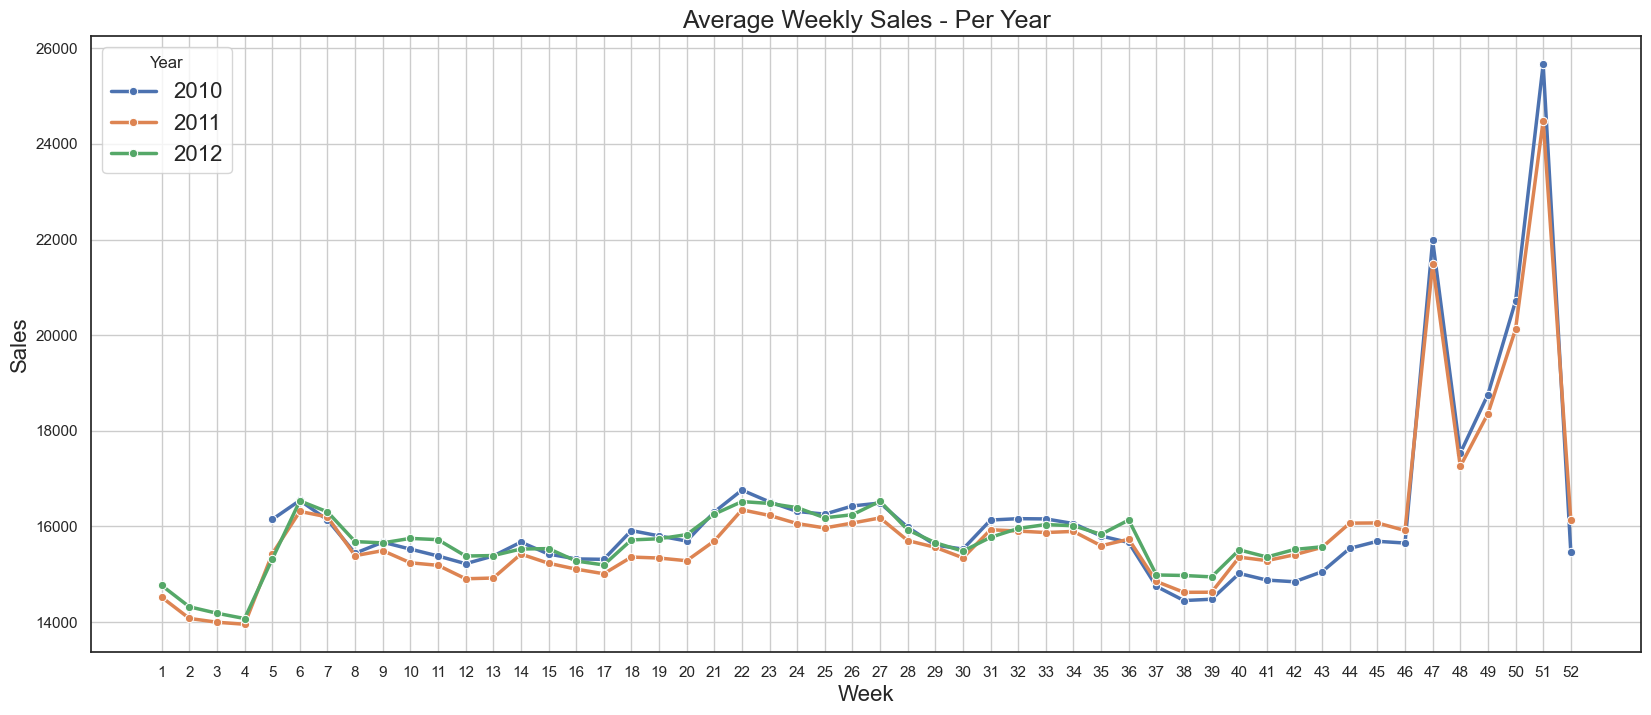

In [ ]:
# Group by 'Year' and 'Week' directly, ensuring the grouping keys are clear and lead to a unique index
sample_weekly_sales_2010 = sample[sample['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean()
sample_weekly_sales_2011 = sample[sample['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean()
sample_weekly_sales_2012 = sample[sample['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(20, 8))

# Use 'linewidth' instead of 'size' to adjust the line width
sns.lineplot(data=weekly_sales_2010, marker='o', label='2010', linewidth=2.5)
sns.lineplot(data=weekly_sales_2011, marker='o', label='2011', linewidth=2.5)
sns.lineplot(data=weekly_sales_2012, marker='o', label='2012', linewidth=2.5)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(title='Year', loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()